In [1]:
import matplotlib.pyplot as plt
from db_utils import RDSDatabaseConnector
from data_transformation import DataTransform
from information import DataFrameInfo
from plotter import Plotter
from dataframe_transformtion import DataFrameTransform

dftrans = DataFrameTransform()
plotter = Plotter()
rds_connector = RDSDatabaseConnector()
transformer = DataTransform()
inform = DataFrameInfo()

In [2]:
df = rds_connector.read_csv_data('loan_payments_data.csv')
df.head()
data = df.copy()
data.columns

Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'term', 'int_rate', 'instalment', 'grade', 'sub_grade',
       'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type'],
      dtype='object')

In [3]:
# Convertings colums to datetime
data = transformer.format_date(data, 'issue_date')
data = transformer.format_date(data, 'earliest_credit_line')
data = transformer.format_date(data,'last_payment_date')
data = transformer.format_date(data, 'next_payment_date')
data = transformer.format_date(data, 'last_credit_pull_date')
# Converting column to int
data = transformer.remove_non_numbers(data, 'term')
data = transformer.column_to_int(data, 'term')
# removing columns that have more than 10% nulls except for next_payment_date there is enough information to work it out
data = dftrans.remove_columns(data, ['mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog'])
# removing rows where where less than 1% of the data in the column is null
data = dftrans.remove_null_rows(data, ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med'])
# missing data 
data = dftrans.fix_next_payment_dates(data, 'next_payment_date', 'last_payment_date')


# Milestone 2 Task 3 Visuals

## Skewness of funded_amount

the skew of funded_amount is : 0.8208113751273644


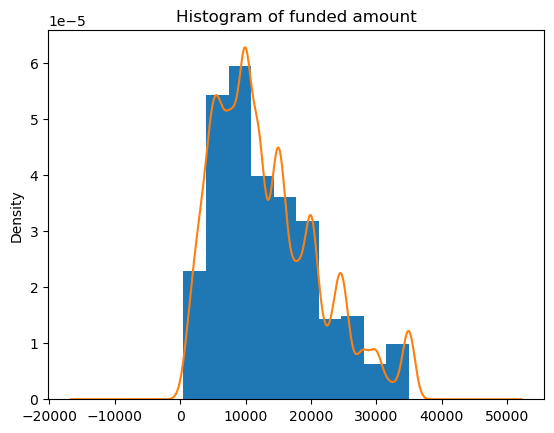

In [4]:
print(plotter.is_data_skew(data, 'funded_amount'))
plt.title('Histogram of funded amount')
plotter.hist_plotter(data['funded_amount'], bins=10)

## Skewness of int_rate

the skew of int_rate is : 0.411540039874641


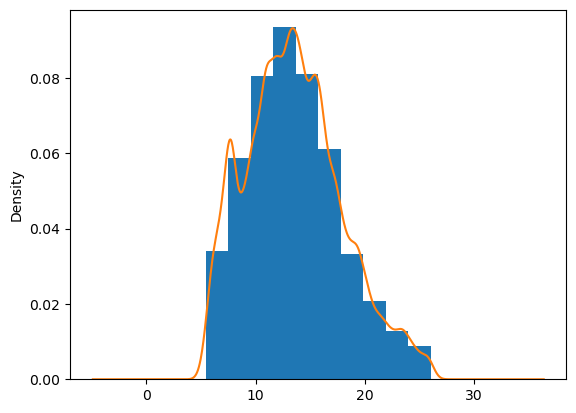

In [5]:
print(plotter.is_data_skew(data, 'int_rate'))
plotter.hist_plotter(data['int_rate'], bins=10)

In [6]:
# missing data in columns are imputed with repective method
data = dftrans.replace_nulls_with_median(data, 'funded_amount')
data = dftrans.replace_nulls_with_mode(data, 'term')
data = dftrans.replace_nulls_with_median(data, 'int_rate')
data = dftrans.replace_nulls_with_mode(data, 'employment_length')

# Milestone 2 task 4

## Original skewness of loan_amount

the skew of loan_amount is : 0.8043121863503576


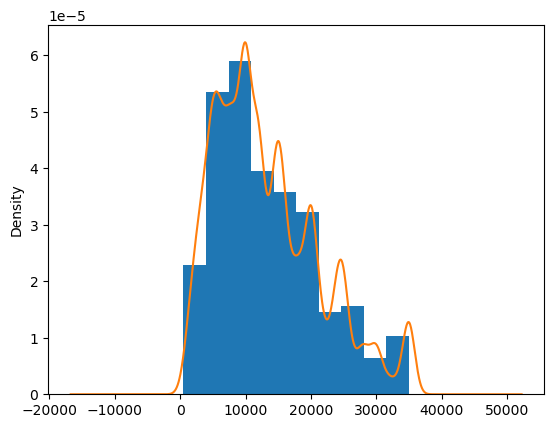

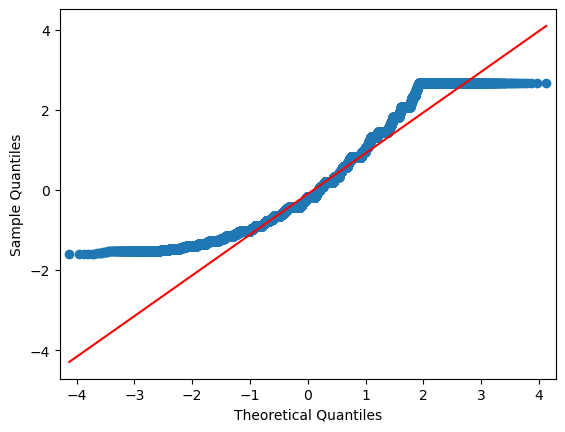

In [7]:
print(plotter.is_data_skew(data, 'loan_amount')) 
plotter.hist_plotter(data['loan_amount'], bins=10)
plotter.qq_plotter(data,'loan_amount' )

## Original skewness of funded_amount

the skew of funded_amount is : 0.8691022091141762


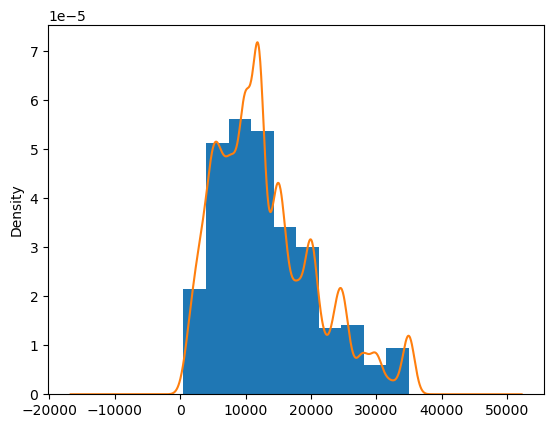

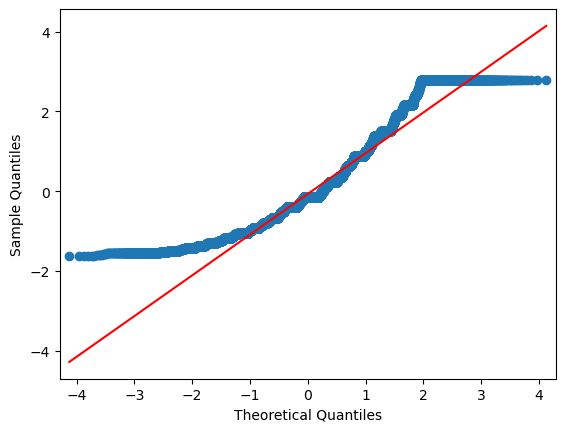

In [8]:
print(plotter.is_data_skew(data, 'funded_amount')) 
plotter.hist_plotter(data['funded_amount'], bins=10)
plotter.qq_plotter(data, 'funded_amount')

## Original skewness of funded_amount_inv

the skew of funded_amount_inv is : 0.8142509295608985


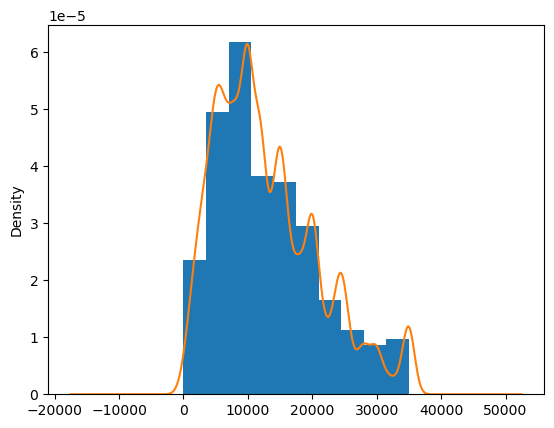

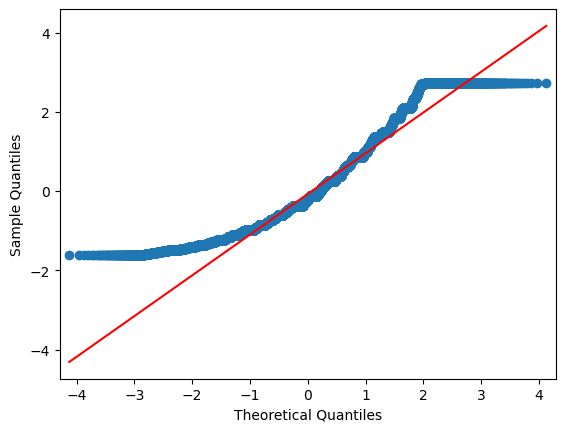

In [9]:
print(plotter.is_data_skew(data, 'funded_amount_inv')) 
plotter.hist_plotter(data['funded_amount_inv'], bins=10)
plotter.qq_plotter(data, 'funded_amount_inv')

## Original skewness of int_rate

the skew of int_rate is : 0.45605544976201656


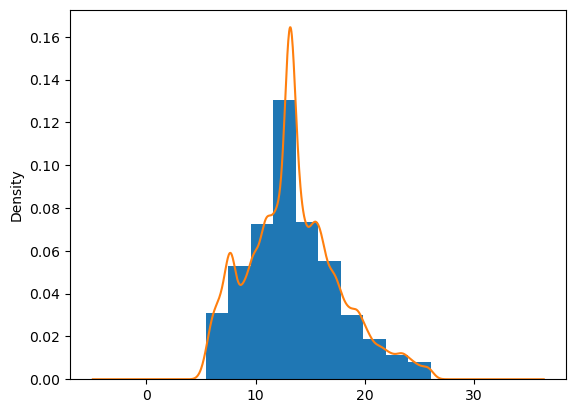

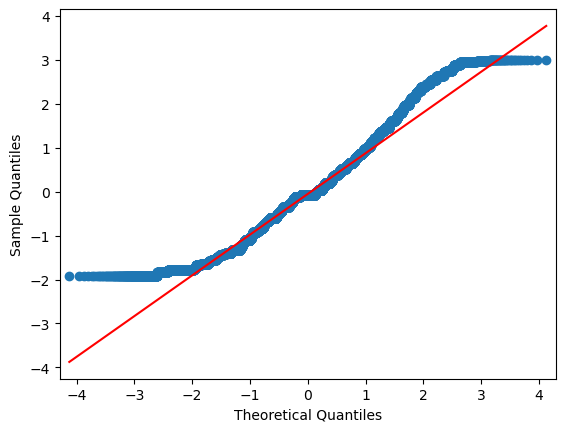

In [10]:
print(plotter.is_data_skew(data, 'int_rate')) 
plotter.hist_plotter(data['int_rate'], bins=10)
plotter.qq_plotter(data, 'int_rate')

## Original skewness of installment

the skew of instalment is : 0.9961503404396858


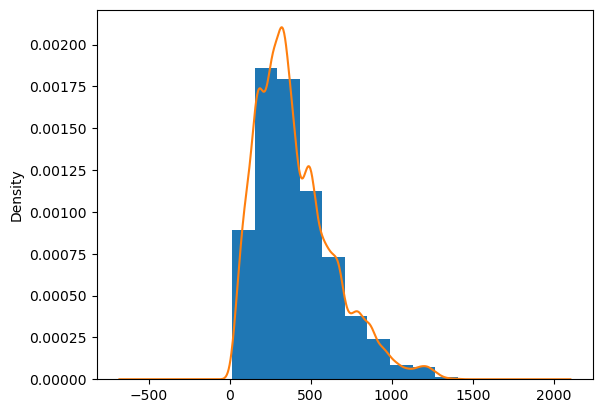

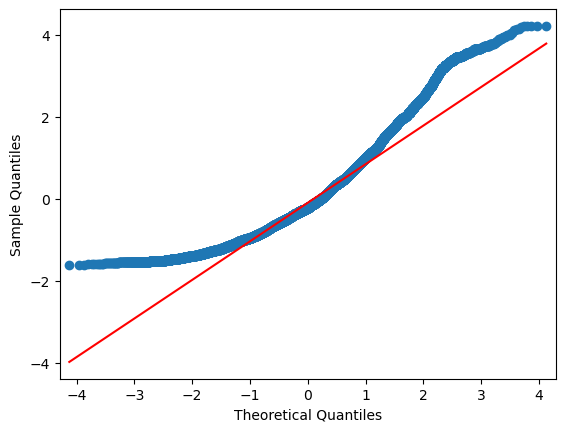

In [11]:
print(plotter.is_data_skew(data, 'instalment')) 
plotter.hist_plotter(data['instalment'], bins=10)
plotter.qq_plotter(data, 'instalment')

## Original skewness of annual_inc

the skew of annual_inc is : 8.73573692583551


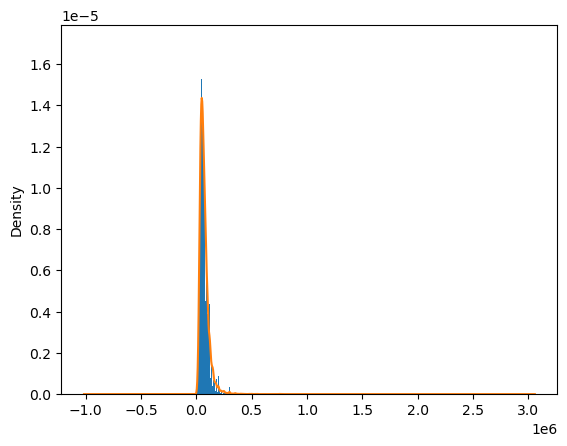

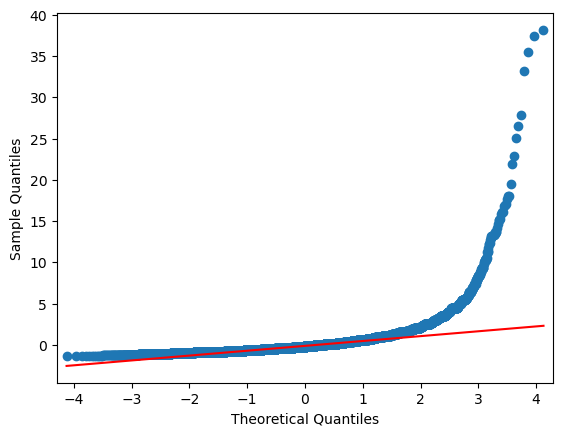

In [12]:
print(plotter.is_data_skew(data, 'annual_inc')) 
plotter.hist_plotter(data['annual_inc'], bins=500)
plotter.qq_plotter(data, 'annual_inc')

## Original skewness of dti

the skew of dti is : 0.18901977139121579


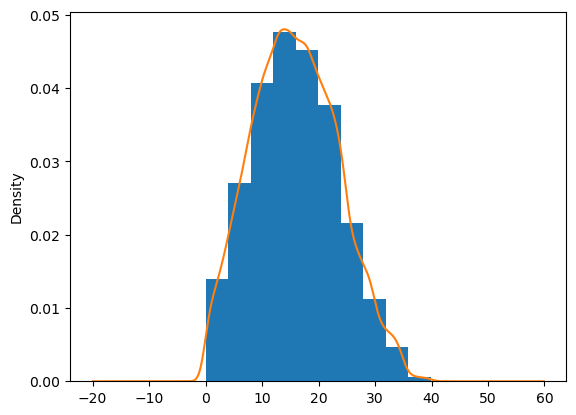

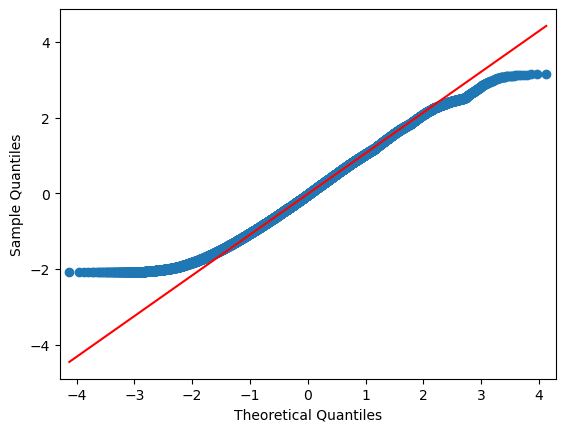

In [13]:
print(plotter.is_data_skew(data, 'dti')) 
plotter.hist_plotter(data['dti'], bins=10)
plotter.qq_plotter(data, 'dti')

## Original skewness of open_accounts

the skew of open_accounts is : 1.0594931166880517


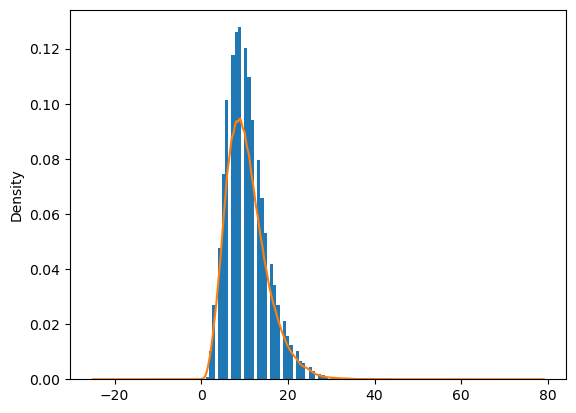

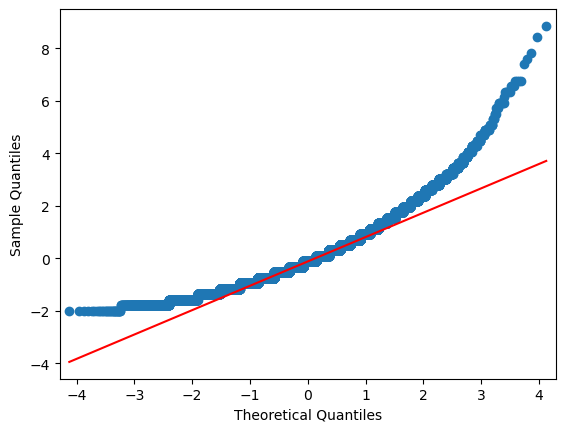

In [14]:
print(plotter.is_data_skew(data, 'open_accounts')) 
plotter.hist_plotter(data['open_accounts'], bins=70)
plotter.qq_plotter(data, 'open_accounts')

## Original skewness of total_accounts

the skew of total_accounts is : 0.7800832932375489


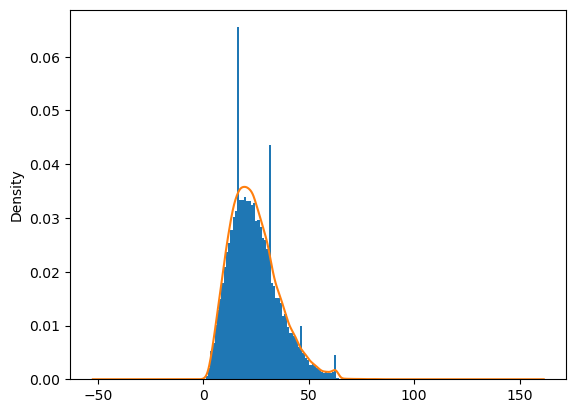

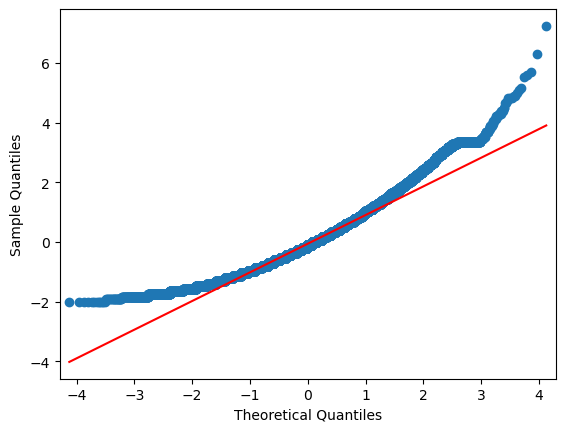

In [15]:
print(plotter.is_data_skew(data, 'total_accounts')) 
plotter.hist_plotter(data['total_accounts'], bins=100)
plotter.qq_plotter(data, 'total_accounts')

## Original skewness of out_prncp

the skew of out_prncp is : 2.352525970614482


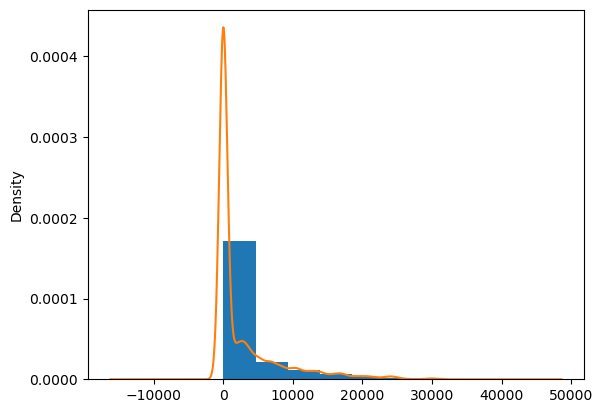

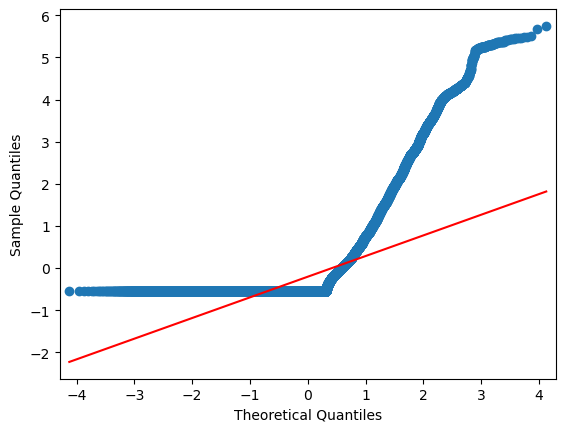

In [16]:
print(plotter.is_data_skew(data, 'out_prncp')) 
plotter.hist_plotter(data['out_prncp'], bins=7)
plotter.qq_plotter(data, 'out_prncp')

## Original skewness of out_prncp_inv

the skew of out_prncp_inv is : 2.3529464346145614


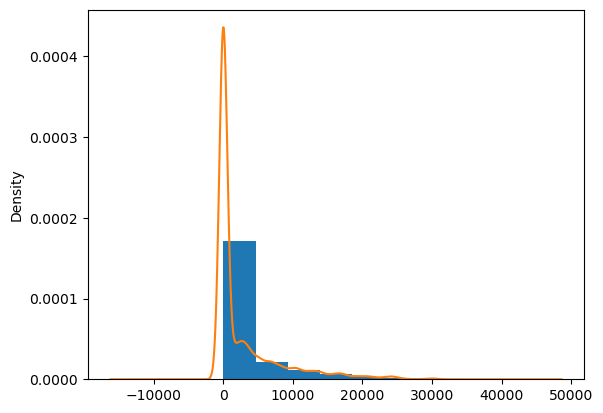

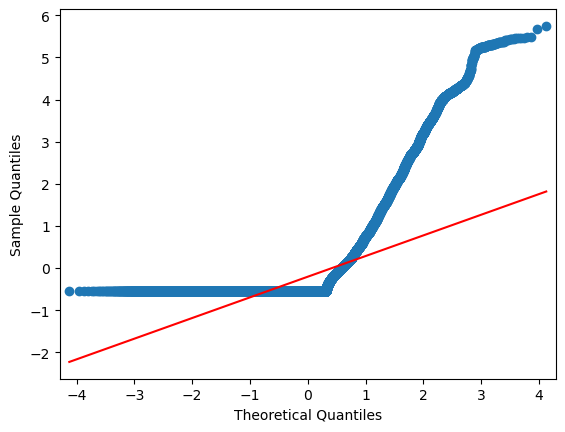

In [17]:
print(plotter.is_data_skew(data, 'out_prncp_inv')) 
plotter.hist_plotter(data['out_prncp_inv'], bins=7)
plotter.qq_plotter(data, 'out_prncp_inv')

## Original skewness of total_payment

the skew of total_payment is : 1.2692662197762663


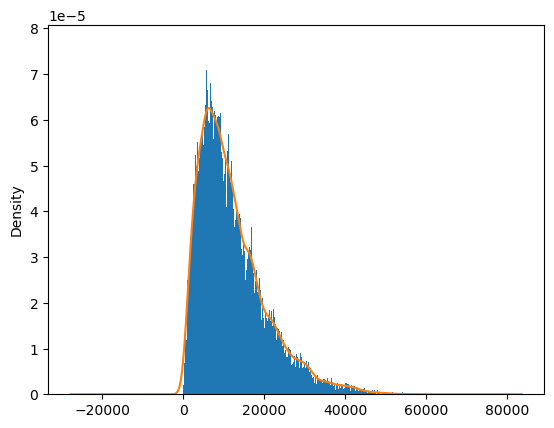

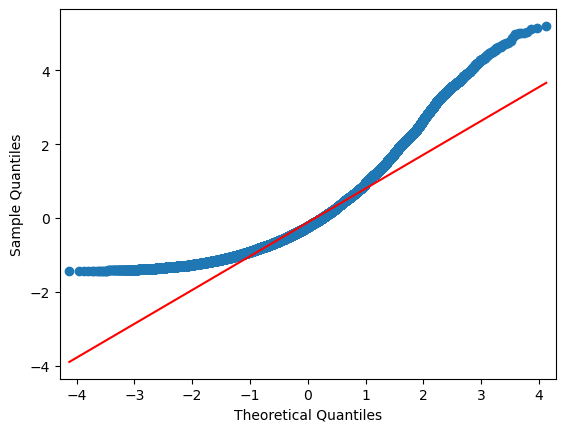

In [18]:
print(plotter.is_data_skew(data, 'total_payment')) 
plotter.hist_plotter(data['total_payment'], bins=500)
plotter.qq_plotter(data, 'total_payment')


## Original skewness of total_rec_int

the skew of total_rec_int is : 2.203625284669197


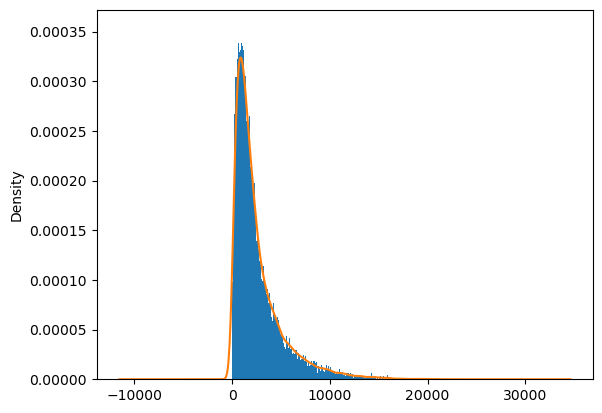

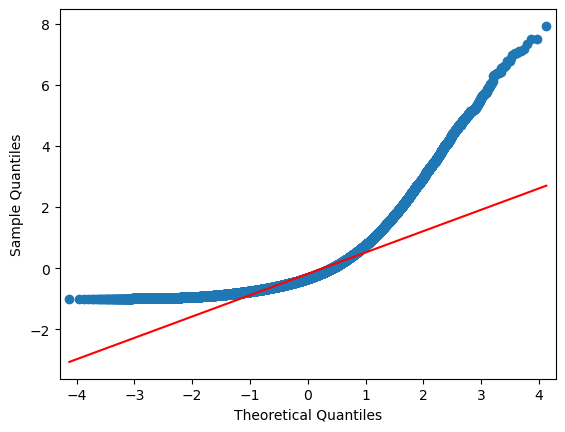

In [19]:
print(plotter.is_data_skew(data, 'total_rec_int')) 
plotter.hist_plotter(data['total_rec_int'], bins=500)
plotter.qq_plotter(data, 'total_rec_int')


## Original skewness of last_payment_amount

the skew of last_payment_amount is : 2.496078600255455


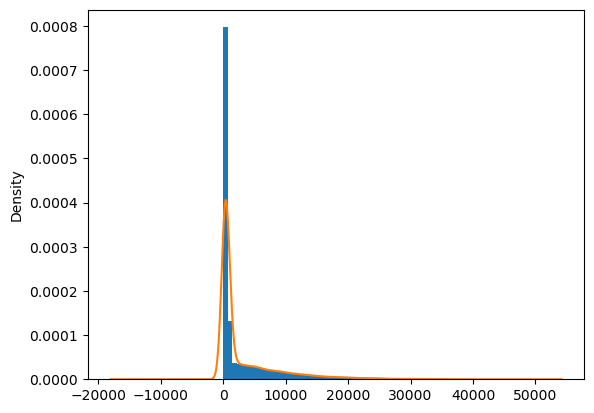

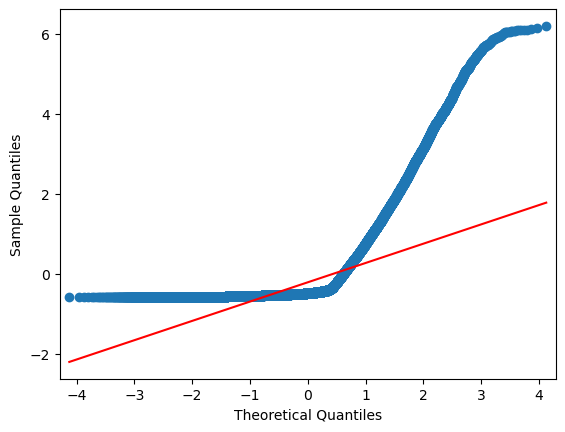

In [20]:
print(plotter.is_data_skew(data, 'last_payment_amount')) 
plotter.hist_plotter(data['last_payment_amount'], bins=50)
plotter.qq_plotter(data, 'last_payment_amount')

## Log transformed skewness loan_amount

the skew of loan_amount is : -0.6775710190311737


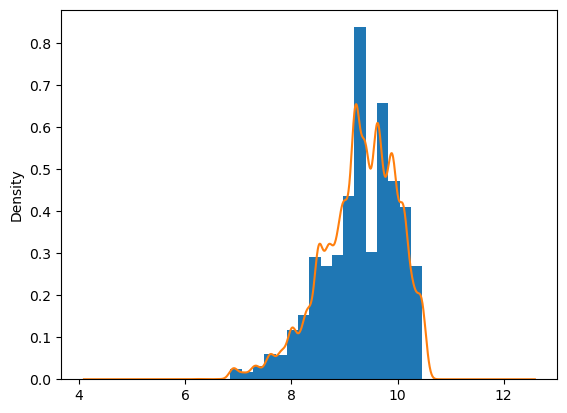

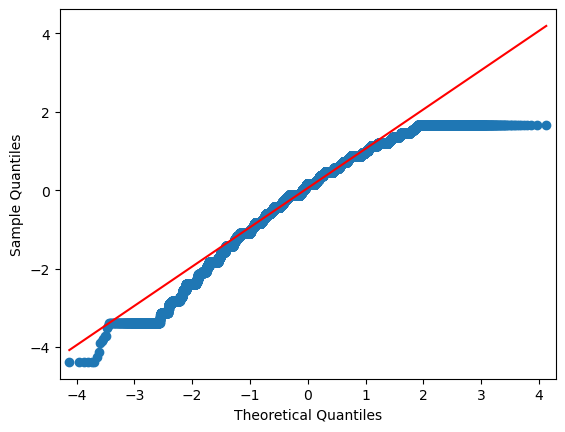

In [21]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'loan_amount')
print(plotter.is_data_skew(logtd1, 'loan_amount'))
plotter.hist_plotter(logtd1['loan_amount'], bins=20)
plotter.qq_plotter(logtd1,'loan_amount')

## Log transformed skewness funded_amount

the skew of funded_amount is : -0.7187849504532033


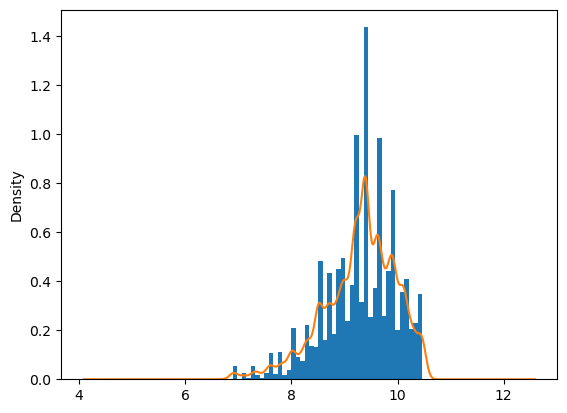

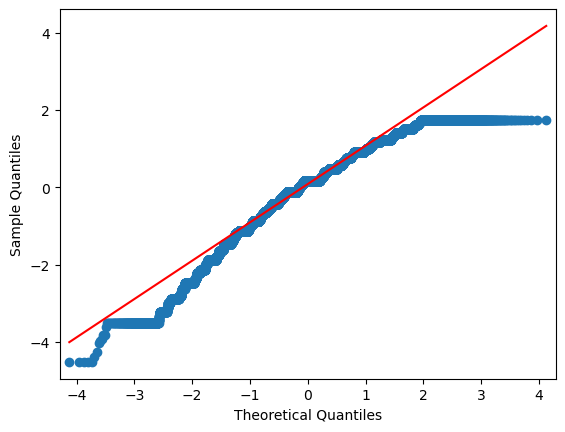

In [22]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'funded_amount')
print(plotter.is_data_skew(logtd1, 'funded_amount'))
plotter.hist_plotter(logtd1['funded_amount'], bins=50)
plotter.qq_plotter(logtd1,'funded_amount')

## Log transformed skewness funded_amount_inv

the skew of funded_amount_inv is : -4.383360545426002


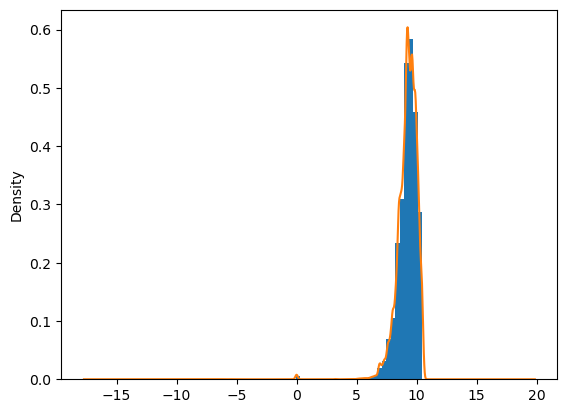

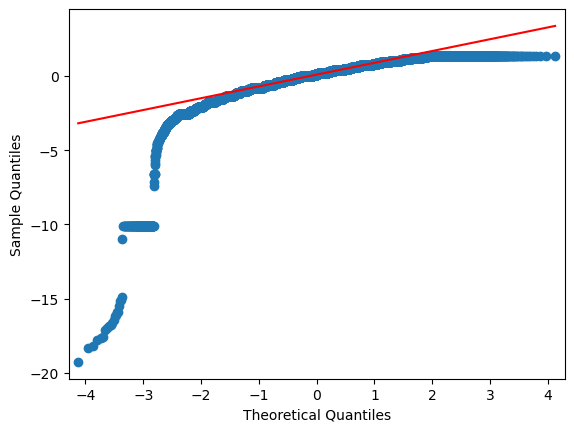

In [23]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'funded_amount_inv')
print(plotter.is_data_skew(logtd1, 'funded_amount_inv'))
plotter.hist_plotter(logtd1['funded_amount_inv'], bins=50)
plotter.qq_plotter(logtd1,'funded_amount_inv')

## Log transformed skewness int_rate

the skew of int_rate is : -0.37927492552407777


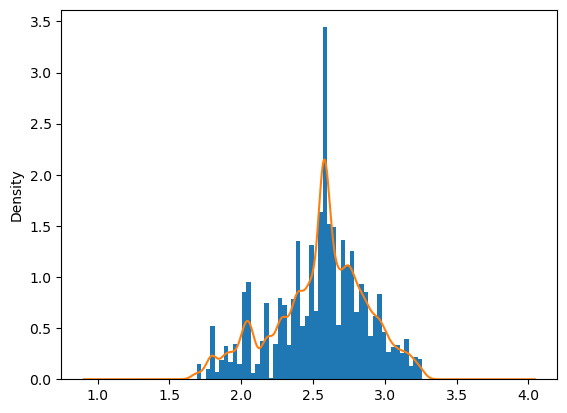

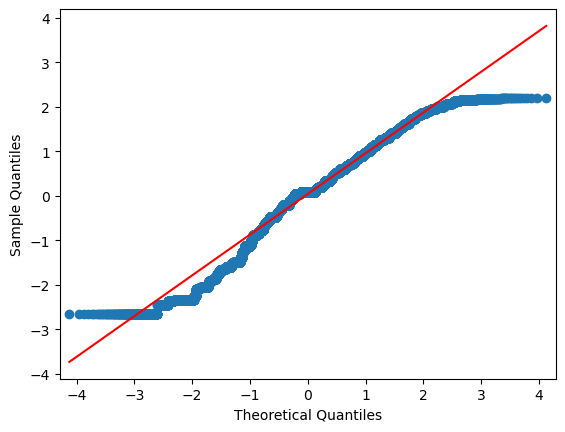

In [24]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'int_rate')
print(plotter.is_data_skew(logtd1, 'int_rate'))
plotter.hist_plotter(logtd1['int_rate'], bins=50)
plotter.qq_plotter(logtd1,'int_rate')


## Log transformed skewness instalment

the skew of instalment is : -0.6675225818935975


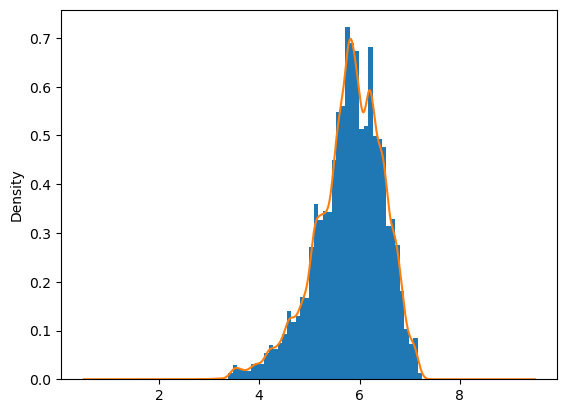

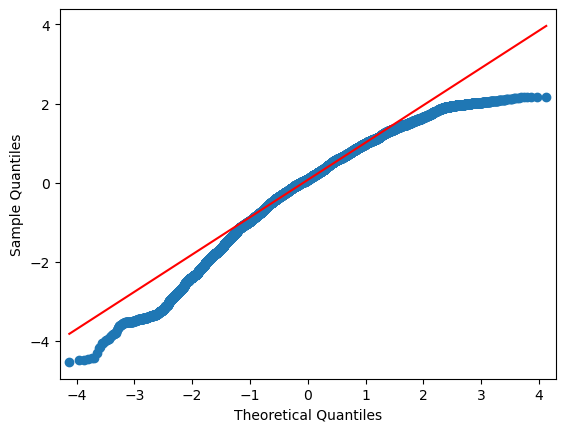

In [25]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'instalment')
print(plotter.is_data_skew(logtd1, 'instalment'))
plotter.hist_plotter(logtd1['instalment'], bins=50)
plotter.qq_plotter(logtd1,'instalment')


## Log transformed skewness annual_inc

the skew of annual_inc is : 0.14181830888070776


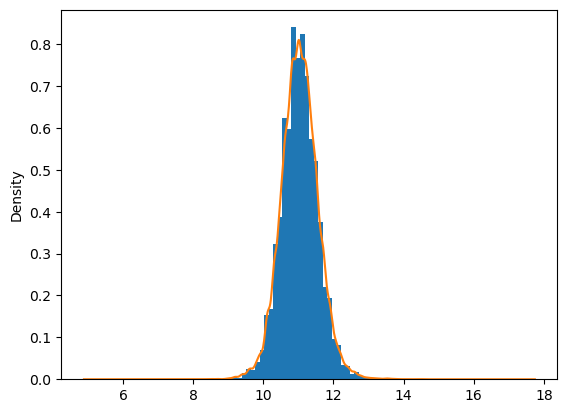

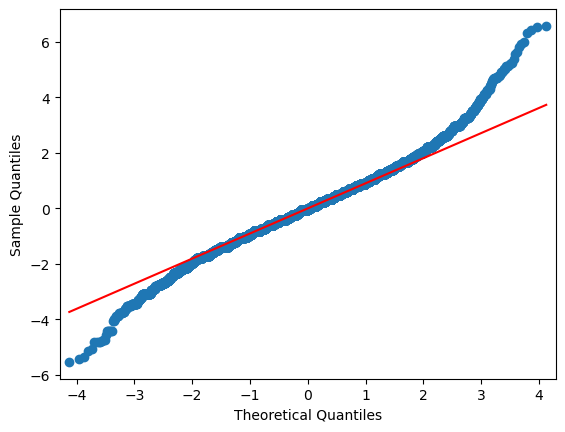

In [26]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'annual_inc')
print(plotter.is_data_skew(logtd1, 'annual_inc'))
plotter.hist_plotter(logtd1['annual_inc'], bins=50)
plotter.qq_plotter(logtd1,'annual_inc')

## Log transformed skewness dti

the skew of dti is : -1.9753048588145603


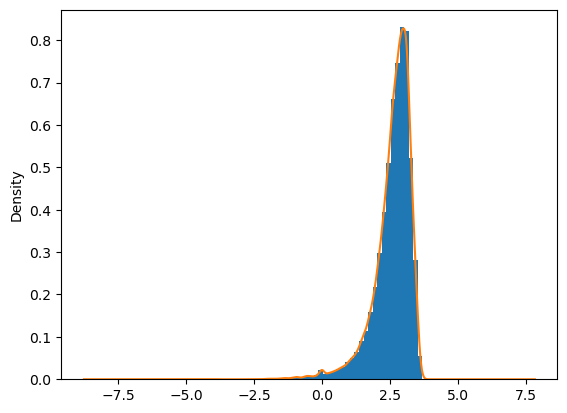

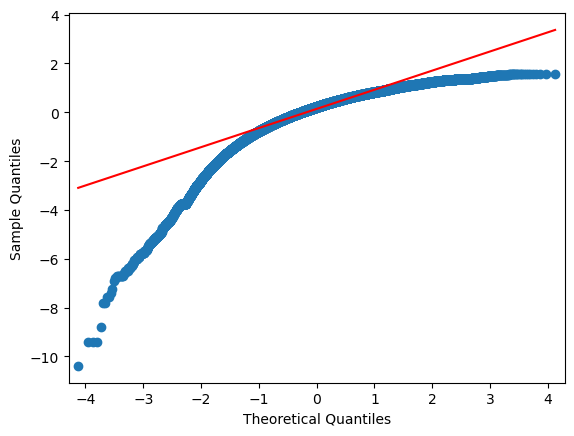

In [27]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'dti')
print(plotter.is_data_skew(logtd1, 'dti'))
plotter.hist_plotter(logtd1['dti'], bins=50)
plotter.qq_plotter(logtd1,'dti')

## Log transformed skewness inq_last_6mths

the skew of inq_last_6mths is : 1.969911955287724


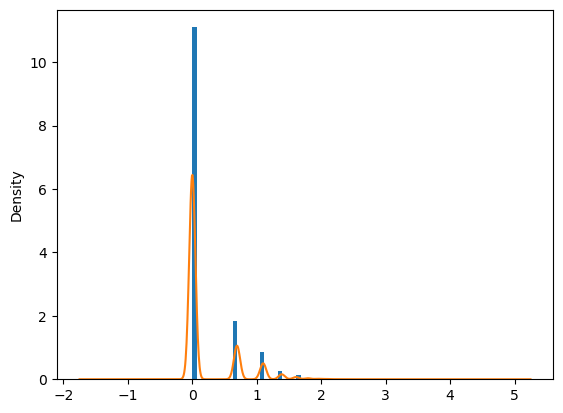

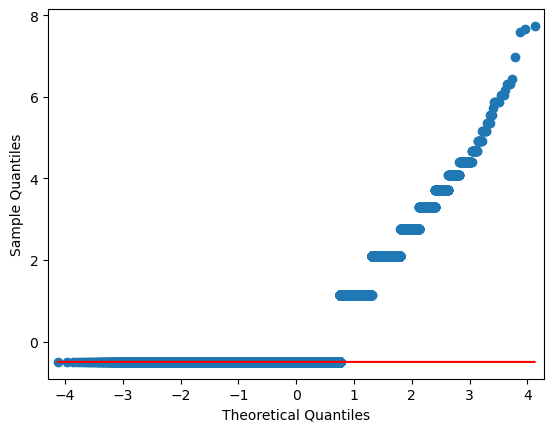

In [28]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'inq_last_6mths')
print(plotter.is_data_skew(logtd1, 'inq_last_6mths'))
plotter.hist_plotter(logtd1['inq_last_6mths'], bins=50)
plotter.qq_plotter(logtd1,'inq_last_6mths')


## Log transformed skewness open_accounts

the skew of open_accounts is : -0.4688202095568502


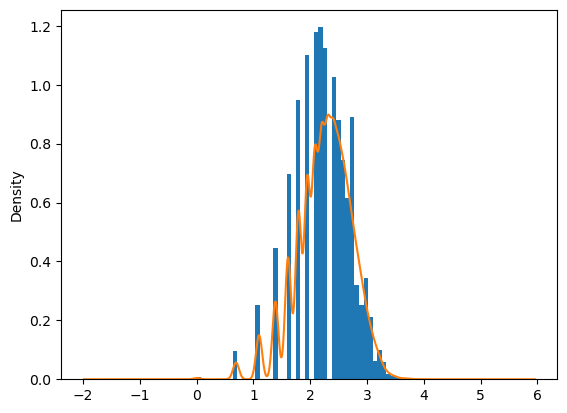

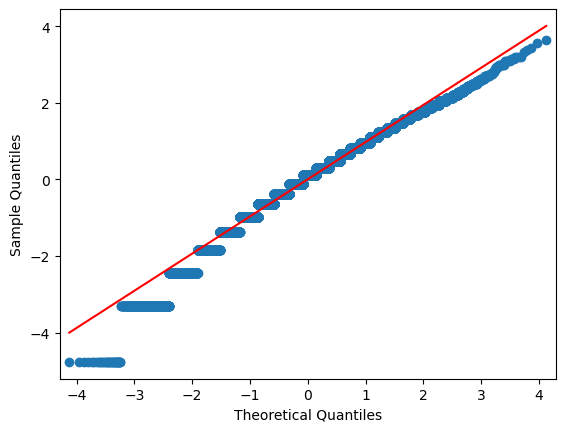

In [29]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'open_accounts')
print(plotter.is_data_skew(logtd1, 'open_accounts'))
plotter.hist_plotter(logtd1['open_accounts'], bins=50)
plotter.qq_plotter(logtd1,'open_accounts')

## Log transformed skewness total_accounts

the skew of total_accounts is : -0.6728147916394636


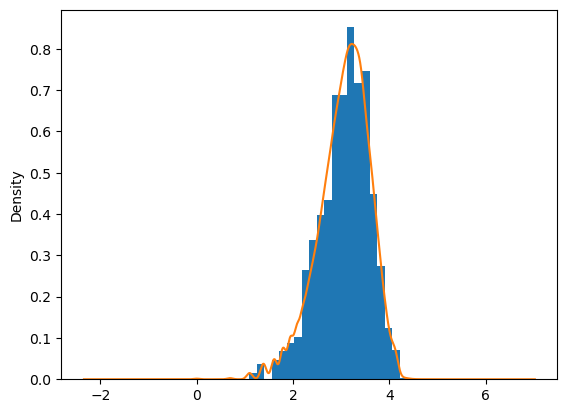

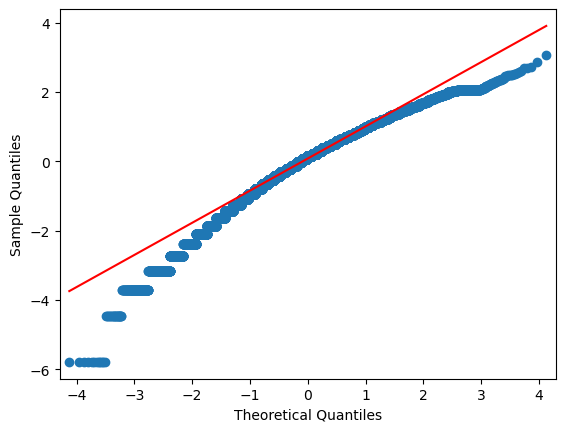

In [30]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'total_accounts')
print(plotter.is_data_skew(logtd1, 'total_accounts'))
plotter.hist_plotter(logtd1['total_accounts'], bins=30)
plotter.qq_plotter(logtd1,'total_accounts')

## Log transformed skewness out_prncp

the skew of out_prncp is : 0.573255877508789


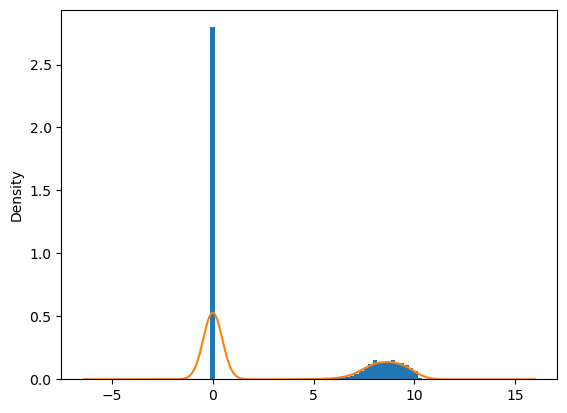

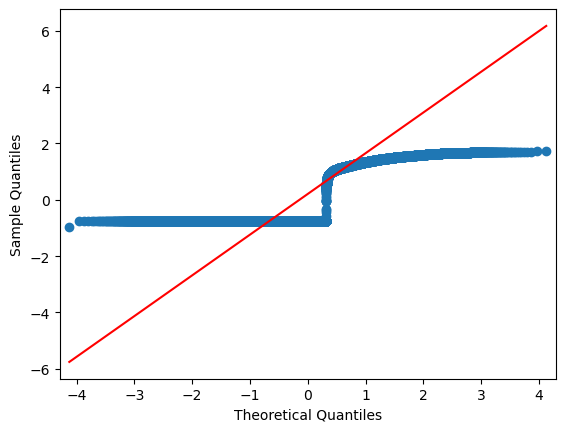

In [31]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'out_prncp')
print(plotter.is_data_skew(logtd1, 'out_prncp'))
plotter.hist_plotter(logtd1['out_prncp'], bins=50)
plotter.qq_plotter(logtd1,'out_prncp')

## Log transformed skewness out_prncp_inv

the skew of out_prncp_inv is : 0.5733299111666511


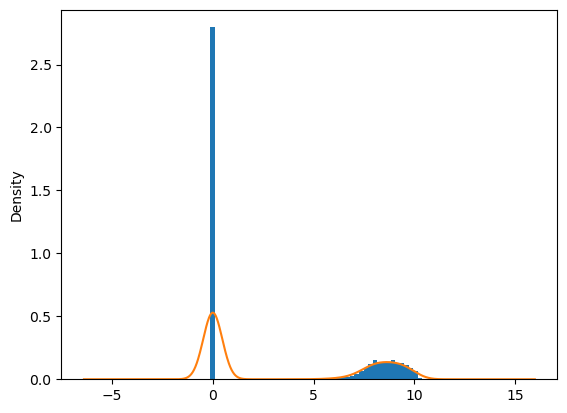

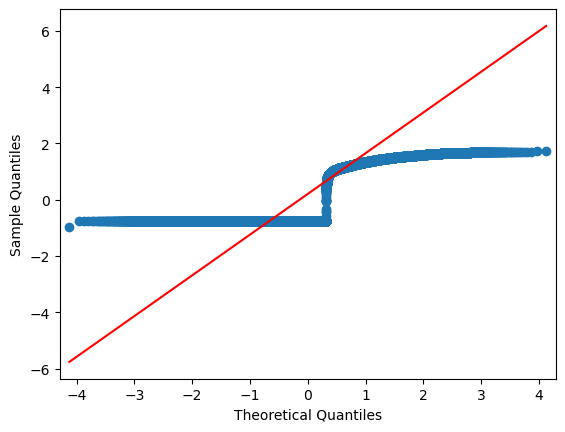

In [32]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'out_prncp_inv')
print(plotter.is_data_skew(logtd1, 'out_prncp_inv'))
plotter.hist_plotter(logtd1['out_prncp_inv'], bins=50)
plotter.qq_plotter(logtd1,'out_prncp_inv')

## Log transformed skewness total_payment

the skew of total_payment is : -0.7539403983723499


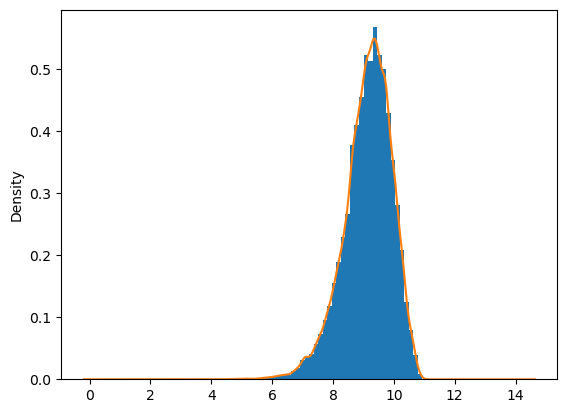

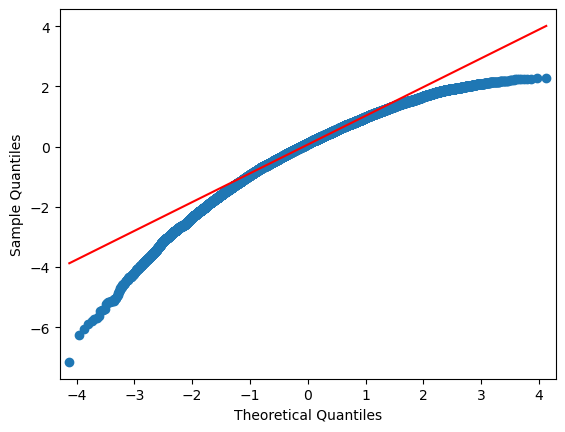

In [33]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'total_payment')
print(plotter.is_data_skew(logtd1, 'total_payment'))
plotter.hist_plotter(logtd1['total_payment'], bins=50)
plotter.qq_plotter(logtd1,'total_payment')

## Log transformed skewness total_rec_int

the skew of total_rec_int is : -0.5635890511324506


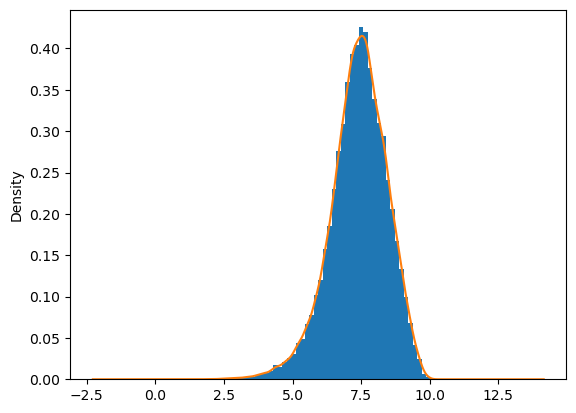

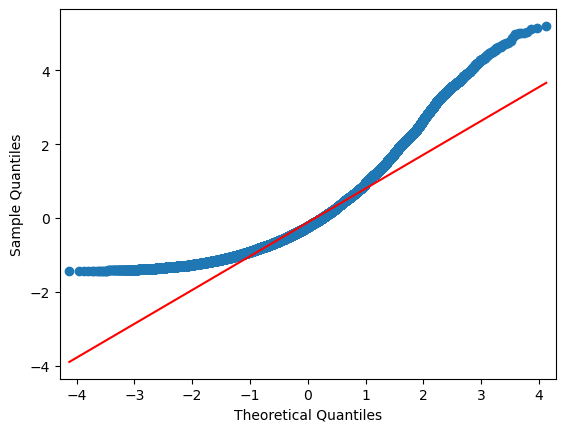

In [34]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'total_rec_int')
print(plotter.is_data_skew(logtd1, 'total_rec_int'))
plotter.hist_plotter(logtd1['total_rec_int'], bins=50)
plotter.qq_plotter(logtd1,'total_payment')

## Log transformed skewness last_payment_amount

the skew of last_payment_amount is : 0.1308251023352019


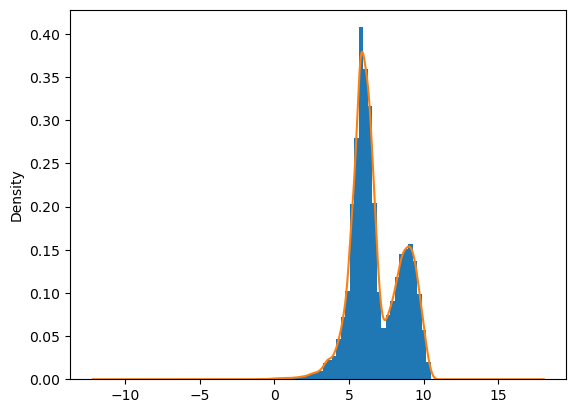

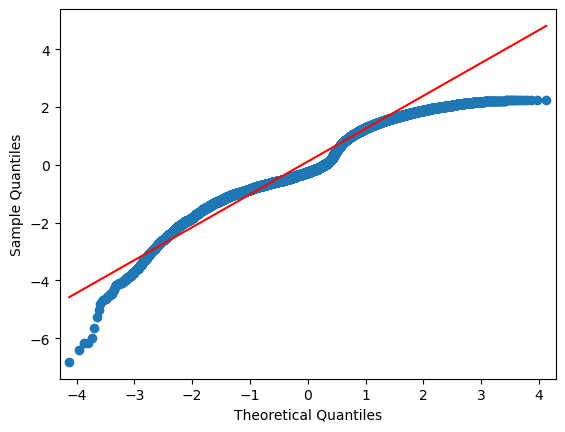

In [35]:
test_data_1 = data.copy()
#log transformation
logtd1 = dftrans.log_transformation(test_data_1,'last_payment_amount')
print(plotter.is_data_skew(logtd1, 'last_payment_amount'))
plotter.hist_plotter(logtd1['last_payment_amount'], bins=50)
plotter.qq_plotter(logtd1,'last_payment_amount')


# Box-Cox transformed skewness loan_amount

the skew of loan_amount is : -0.04279091678630811


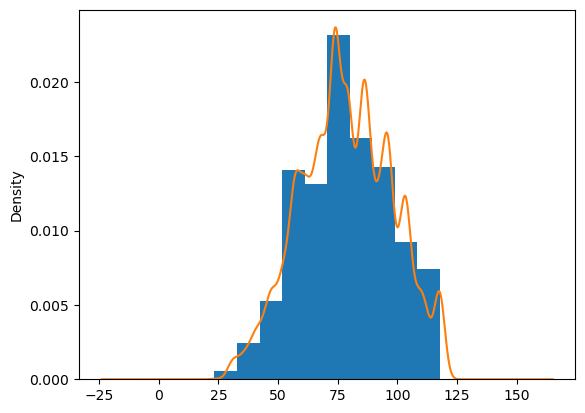

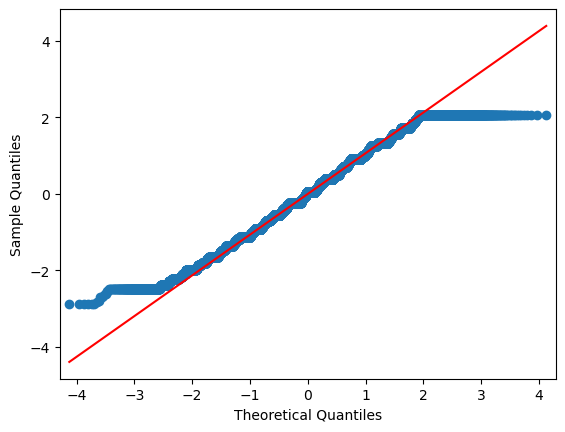

In [36]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'loan_amount')
print(plotter.is_data_skew(td2, 'loan_amount'))
plotter.hist_plotter(td2['loan_amount'], bins=10)
plotter.qq_plotter(td2,'loan_amount')

# Box-Cox transformed skewness funded_amount

the skew of funded_amount is : -0.029740260695868458


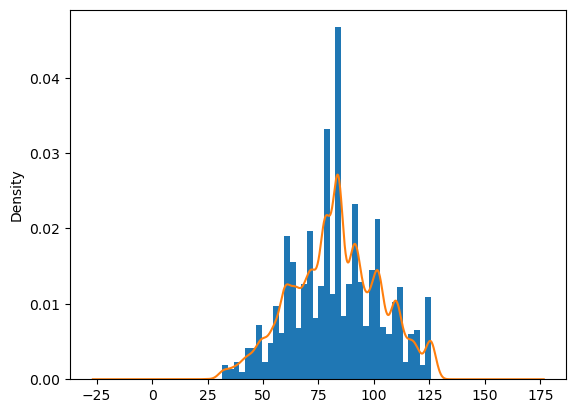

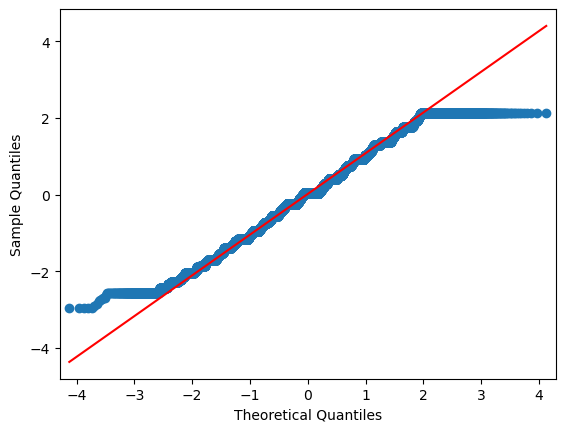

In [37]:
# box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'funded_amount')
print(plotter.is_data_skew(td2, 'funded_amount'))
plotter.hist_plotter(td2['funded_amount'], bins=40)
plotter.qq_plotter(td2,'funded_amount')

# Box-Cox transformed skewness int_rate

the skew of int_rate is : -0.013641728908871657


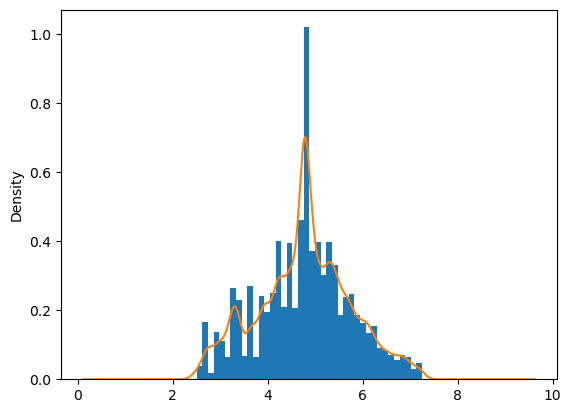

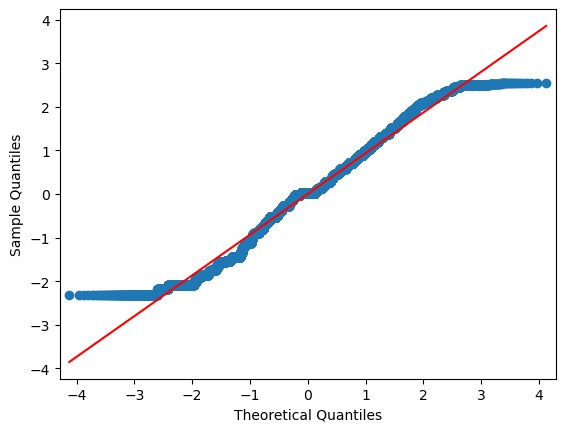

In [38]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'int_rate')
print(plotter.is_data_skew(td2, 'int_rate'))
plotter.hist_plotter(td2['int_rate'], bins=40)
plotter.qq_plotter(td2,'int_rate')


# Box-Cox transformed skewness instalment

the skew of instalment is : -0.02049323731013329


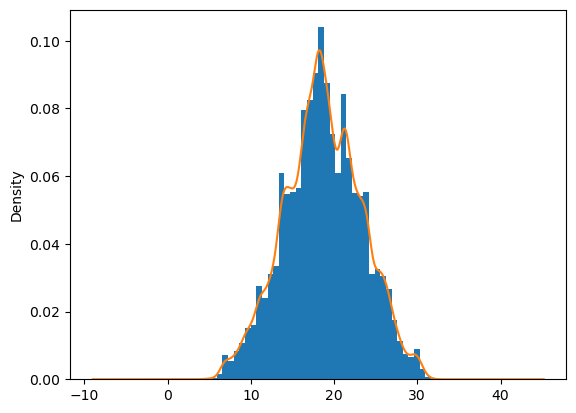

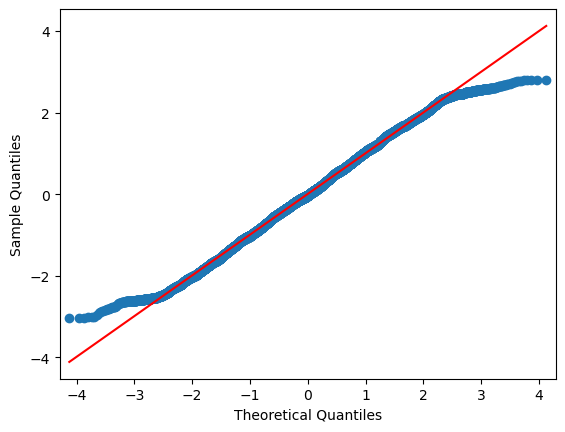

In [39]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'instalment')
print(plotter.is_data_skew(td2, 'instalment'))
plotter.hist_plotter(td2['instalment'], bins=40)
plotter.qq_plotter(td2,'instalment')

# Box-Cox transformed skewness annual_inc

the skew of annual_inc is : -0.01217069528644846


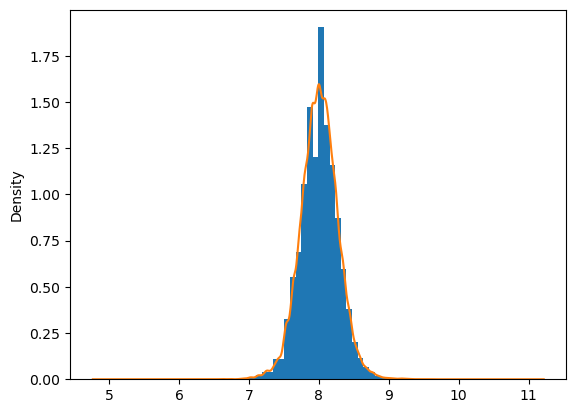

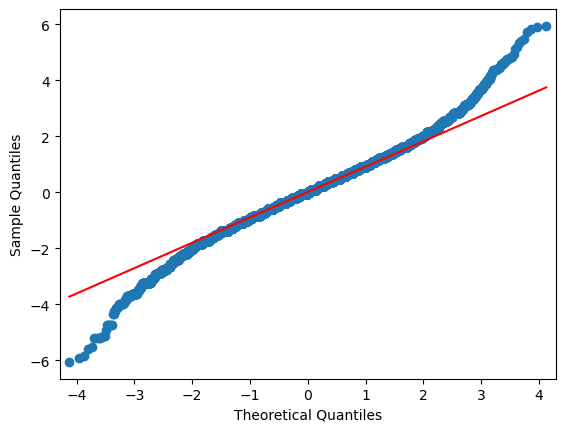

In [40]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'annual_inc')
print(plotter.is_data_skew(td2, 'annual_inc'))
plotter.hist_plotter(td2['annual_inc'], bins=40)
plotter.qq_plotter(td2,'annual_inc')

# Box-Cox transformed skewness open_accounts

the skew of open_accounts is : 0.00589857370138407


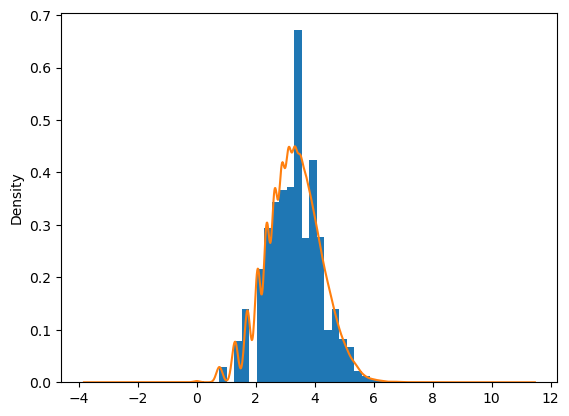

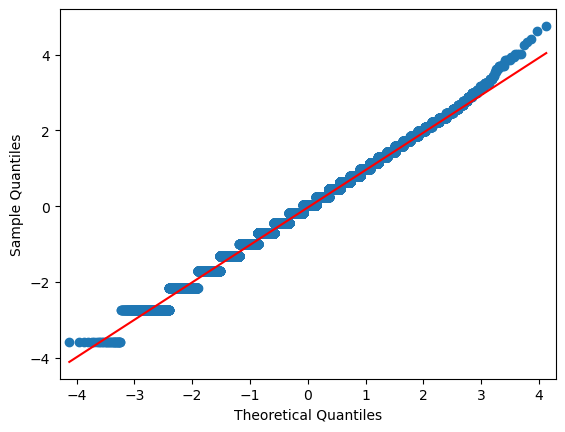

In [41]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'open_accounts')
print(plotter.is_data_skew(td2, 'open_accounts'))
plotter.hist_plotter(td2['open_accounts'], bins=30)
plotter.qq_plotter(td2,'open_accounts')


# Box-Cox transformed skewness total_accounts

the skew of total_accounts is : -0.012728210615202394


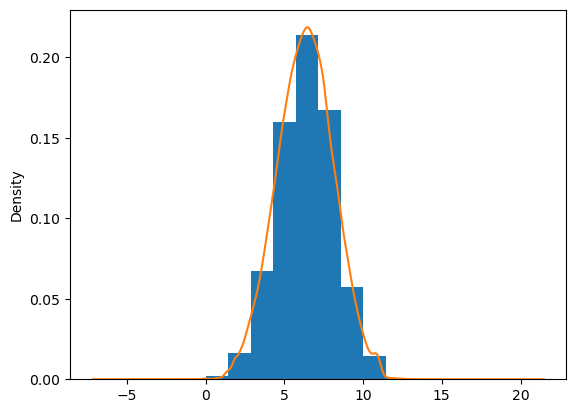

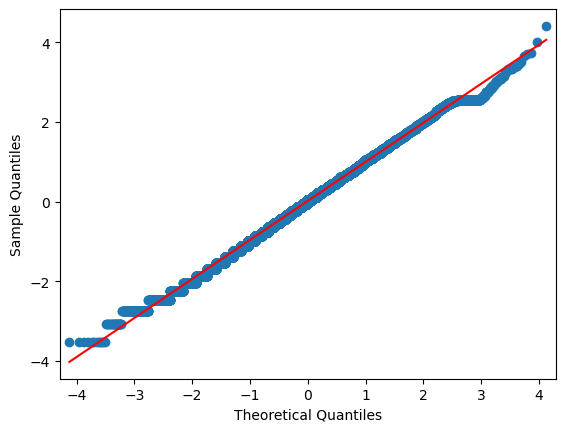

In [42]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'total_accounts')
print(plotter.is_data_skew(td2, 'total_accounts'))
plotter.hist_plotter(td2['total_accounts'], bins=10)
plotter.qq_plotter(td2,'total_accounts')

# Box-Cox transformed skewness total_payment

the skew of total_payment is : -0.0140111452979831


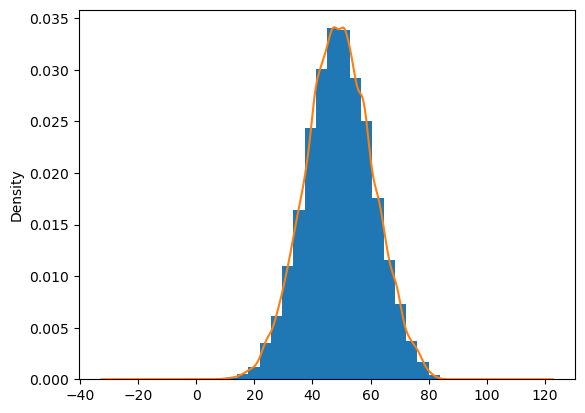

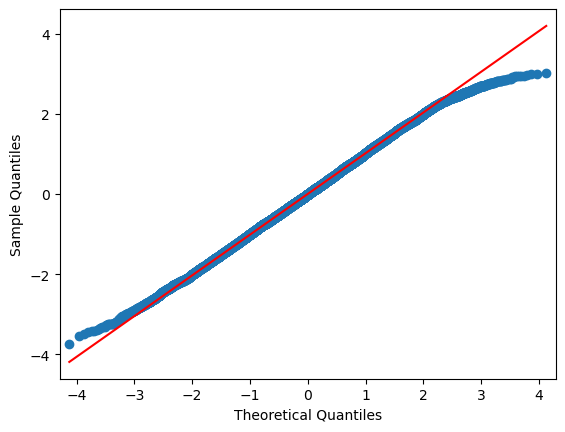

In [43]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'total_payment')
print(plotter.is_data_skew(td2, 'total_payment'))
plotter.hist_plotter(td2['total_payment'], bins=20)
plotter.qq_plotter(td2,'total_payment')

# Box-Cox transformed skewness total_rec_int

the skew of total_rec_int is : 0.0018735011374811246


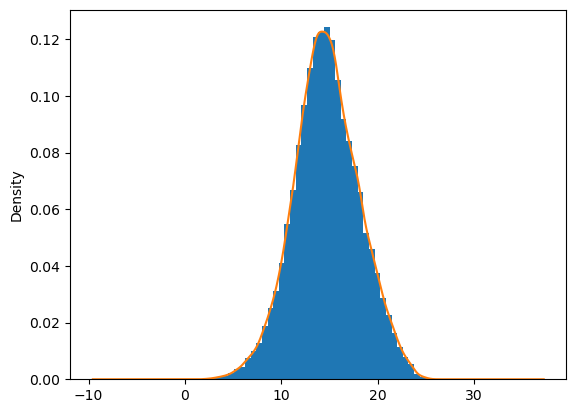

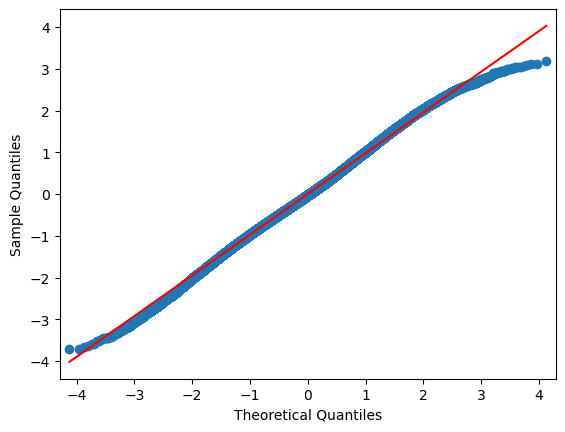

In [44]:
#box cox transformation
test_data_1 = data.copy()
td2 = dftrans.box_cox_transformation(test_data_1,'total_rec_int')
print(plotter.is_data_skew(td2, 'total_rec_int'))
plotter.hist_plotter(td2['total_rec_int'], bins=40)
plotter.qq_plotter(td2,'total_rec_int')

# Yeo-Johnson transformed skewness loan_amount

the skew of loan_amount is : -0.042781679815426576


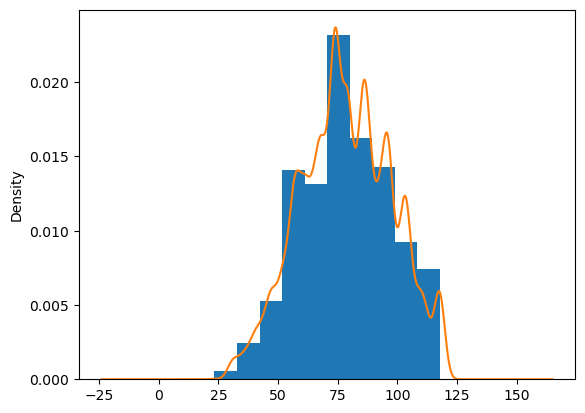

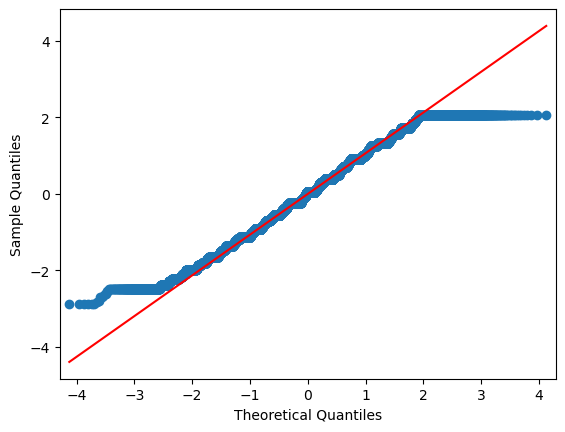

In [45]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'loan_amount')
print(plotter.is_data_skew(td3, 'loan_amount'))
plotter.hist_plotter(td3['loan_amount'], bins=10)
plotter.qq_plotter(td3,'loan_amount')


# Yeo-Johnson transformed skewness funded_amount

the skew of funded_amount is : -0.02973550933867678


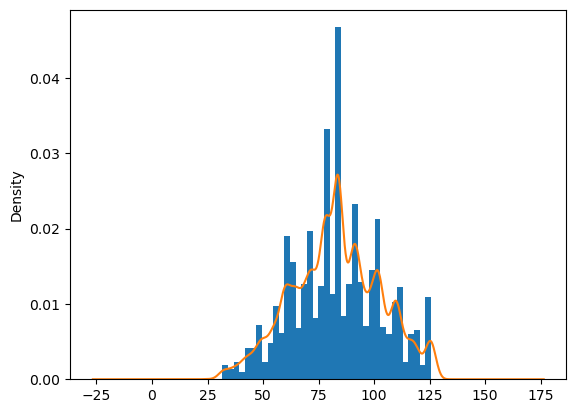

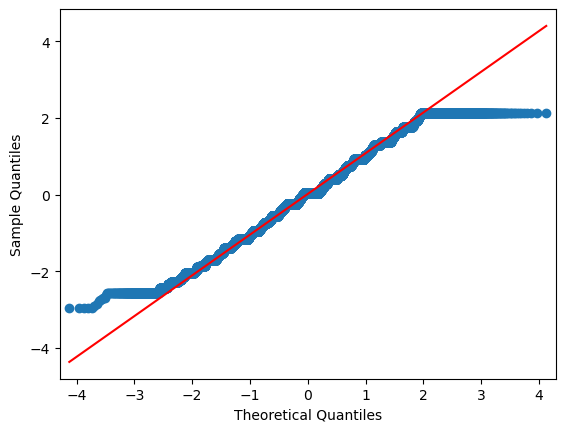

In [46]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'funded_amount')
print(plotter.is_data_skew(td3, 'funded_amount'))
plotter.hist_plotter(td3['funded_amount'], bins=40)
plotter.qq_plotter(td3,'funded_amount')

# Yeo-Johnson transformed skewness funded_amount_inv

the skew of funded_amount_inv is : -0.03504748585278237


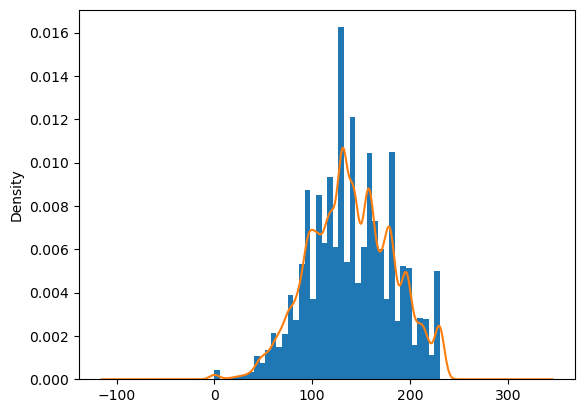

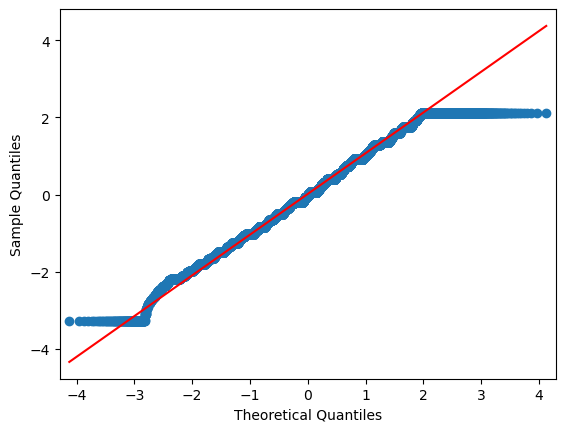

In [47]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'funded_amount_inv')
print(plotter.is_data_skew(td3, 'funded_amount_inv'))
plotter.hist_plotter(td3['funded_amount_inv'], bins=40)
plotter.qq_plotter(td3,'funded_amount_inv')

# Yeo-Johnson transformed skewness int_rate

the skew of int_rate is : -0.01132429589270825


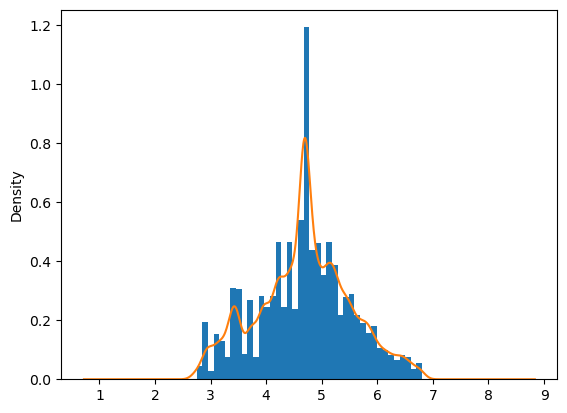

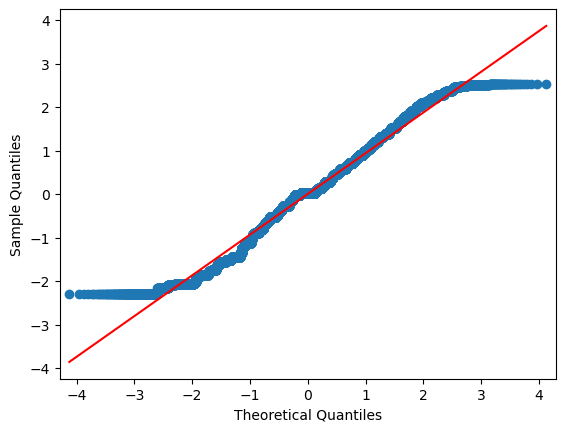

In [48]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'int_rate')
print(plotter.is_data_skew(td3, 'int_rate'))
plotter.hist_plotter(td3['int_rate'], bins=40)
plotter.qq_plotter(td3,'int_rate')


# Yeo-Johnson transformed skewness instalment

the skew of instalment is : -0.020438697323002256


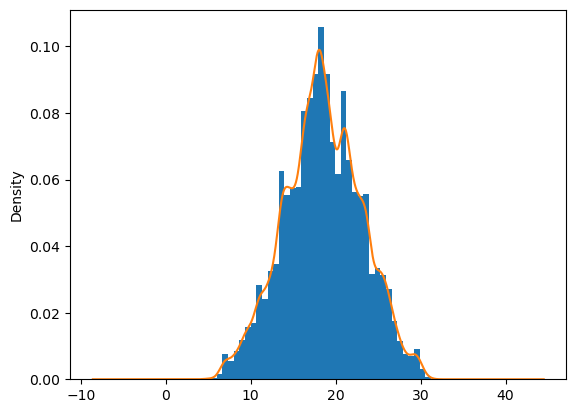

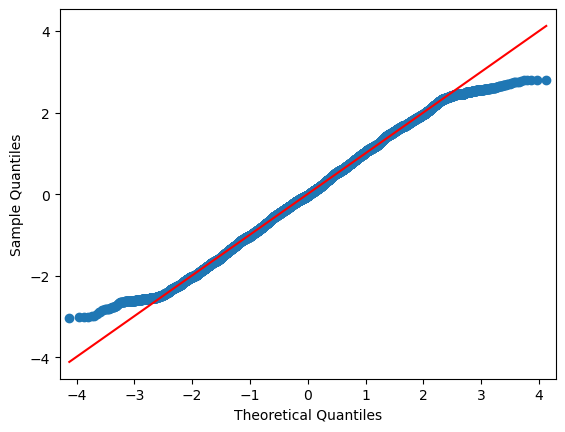

In [49]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'instalment')
print(plotter.is_data_skew(td3, 'instalment'))
plotter.hist_plotter(td3['instalment'], bins=40)
plotter.qq_plotter(td3,'instalment')


# Yeo-Johnson transformed skewness annual_inc

the skew of annual_inc is : -0.012173903696066262


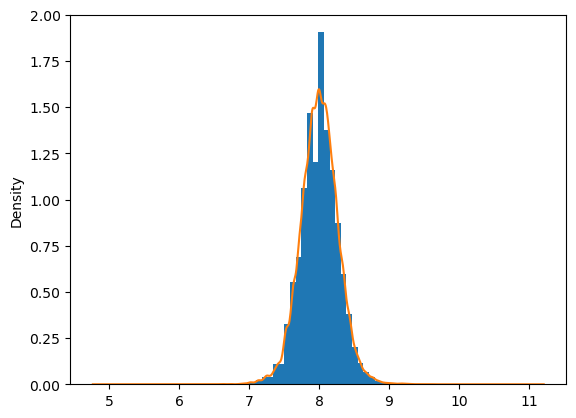

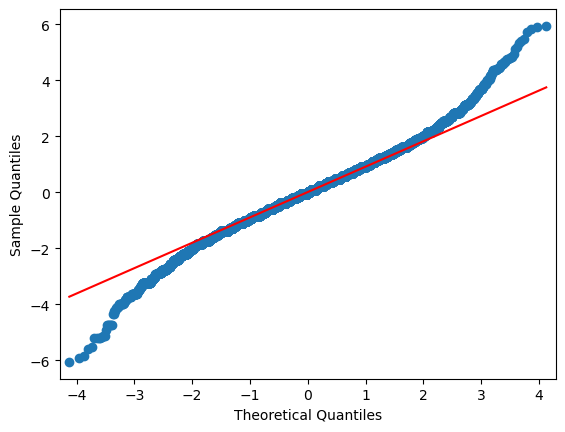

In [50]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'annual_inc')
print(plotter.is_data_skew(td3, 'annual_inc'))
plotter.hist_plotter(td3['annual_inc'], bins=40)
plotter.qq_plotter(td3,'annual_inc')


# Yeo-Johnson transformed skewness dti

the skew of dti is : -0.08726934352991135


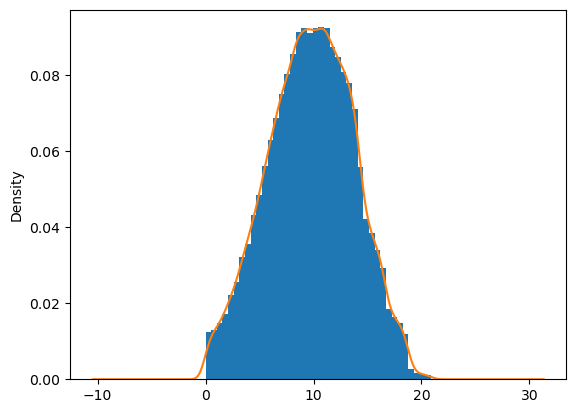

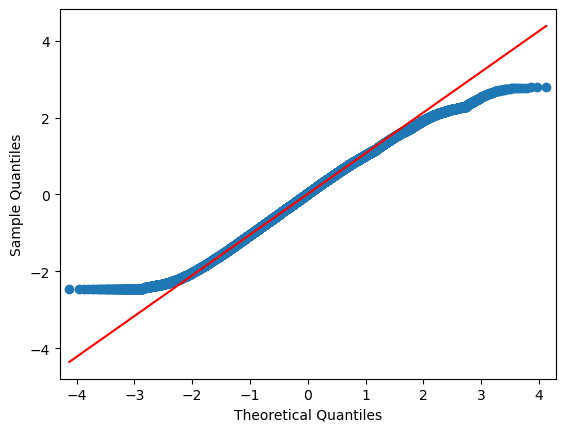

In [51]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'dti')
print(plotter.is_data_skew(td3, 'dti'))
plotter.hist_plotter(td3['dti'], bins=40)
plotter.qq_plotter(td3,'dti')

# Yeo-Johnson transformed skewness inq_last_6mths

the skew of inq_last_6mths is : 0.2509609175699537


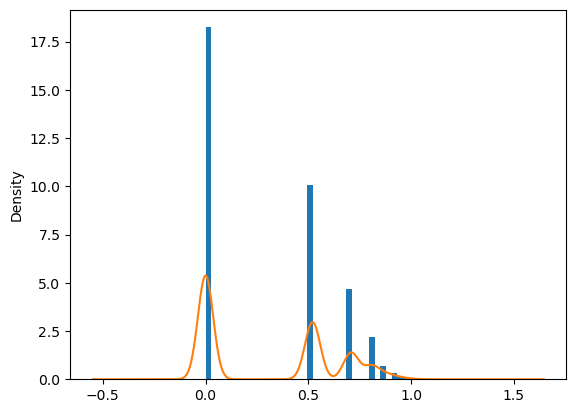

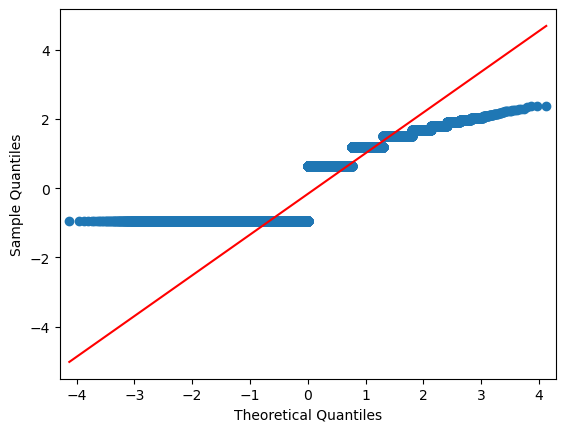

In [52]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'inq_last_6mths')
print(plotter.is_data_skew(td3, 'inq_last_6mths'))
plotter.hist_plotter(td3['inq_last_6mths'], bins=40)
plotter.qq_plotter(td3,'inq_last_6mths')

# Yeo-Johnson transformed skewness open_accounts

the skew of open_accounts is : 0.001398713439289531


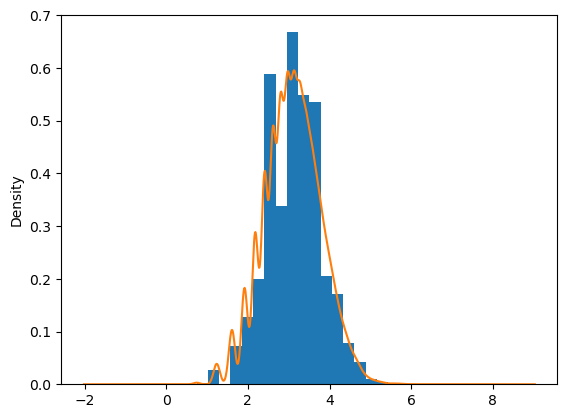

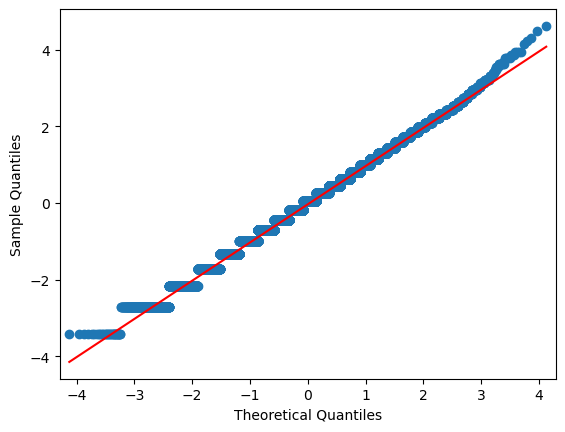

In [53]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'open_accounts')
print(plotter.is_data_skew(td3, 'open_accounts'))
plotter.hist_plotter(td3['open_accounts'], bins=20)
plotter.qq_plotter(td3,'open_accounts')

# Yeo-Johnson transformed skewness total_accounts

the skew of total_accounts is : -0.012742196327822104


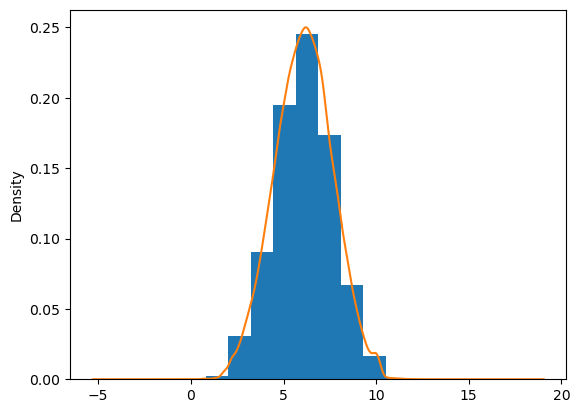

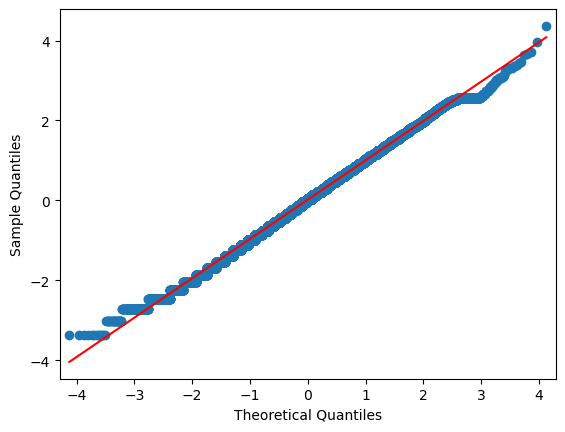

In [54]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'total_accounts')
print(plotter.is_data_skew(td3, 'total_accounts'))
plotter.hist_plotter(td3['total_accounts'], bins=10)
plotter.qq_plotter(td3,'total_accounts')


# Yeo-Johnson transformed skewness out_prncp

the skew of out_prncp is : 0.5283080258900542


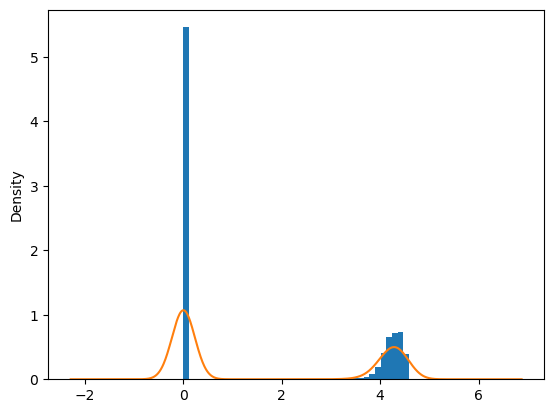

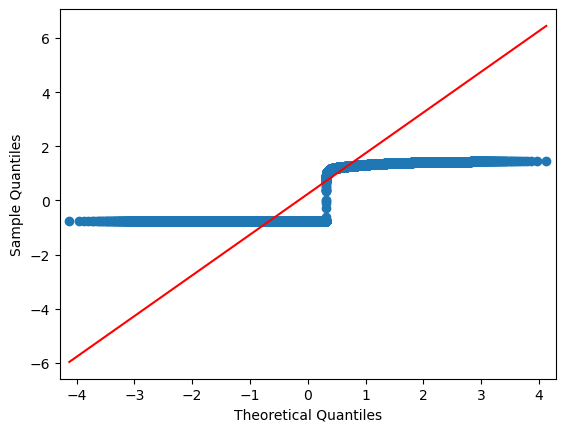

In [55]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'out_prncp')
print(plotter.is_data_skew(td3, 'out_prncp'))
plotter.hist_plotter(td3['out_prncp'], bins=40)
plotter.qq_plotter(td3,'out_prncp')


# Yeo-Johnson transformed skewness out_prncp_inv

the skew of out_prncp_inv is : 0.5283259381757791


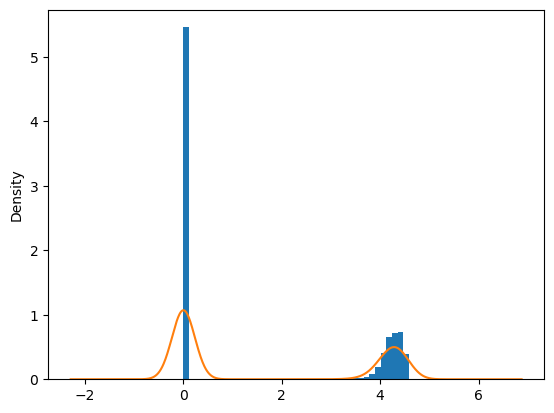

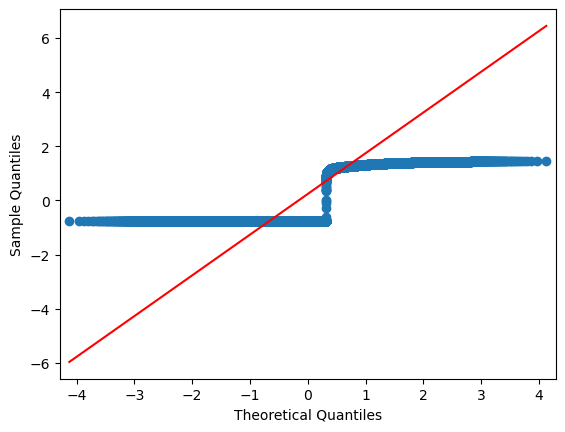

In [56]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'out_prncp_inv')
print(plotter.is_data_skew(td3, 'out_prncp_inv'))
plotter.hist_plotter(td3['out_prncp_inv'], bins=40)
plotter.qq_plotter(td3,'out_prncp_inv')


# Yeo-Johnson transformed skewness total_payment

the skew of total_payment is : -0.014032730766811266


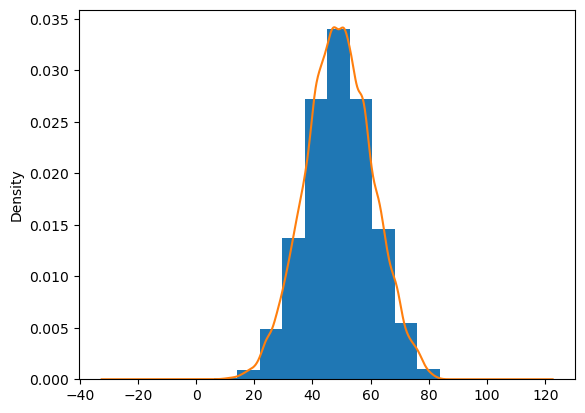

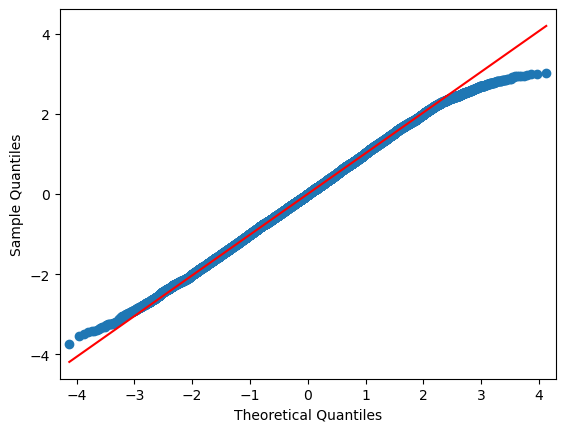

In [57]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'total_payment')
print(plotter.is_data_skew(td3, 'total_payment'))
plotter.hist_plotter(td3['total_payment'], bins=10)
plotter.qq_plotter(td3,'total_payment')


# Yeo-Johnson transformed skewness total_rec_int

the skew of total_rec_int is : 0.0014586946557612259


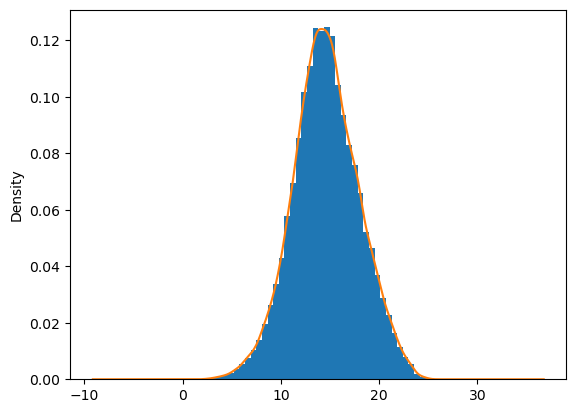

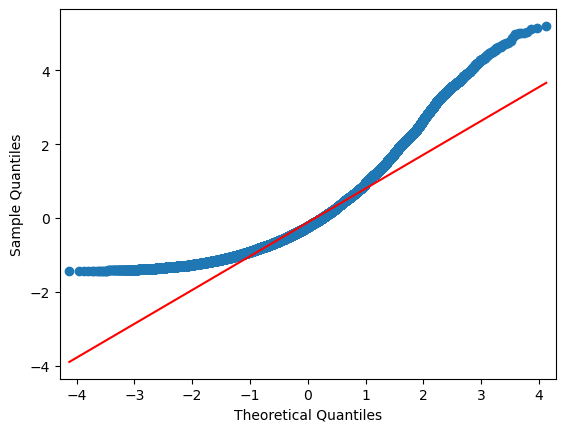

In [58]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'total_rec_int')
print(plotter.is_data_skew(td3, 'total_rec_int'))
plotter.hist_plotter(td3['total_rec_int'], bins=40)
plotter.qq_plotter(td3,'total_payment')

# Yeo-Johnson transformed skewness last_payment_amount

the skew of last_payment_amount is : 0.0025837079511045824


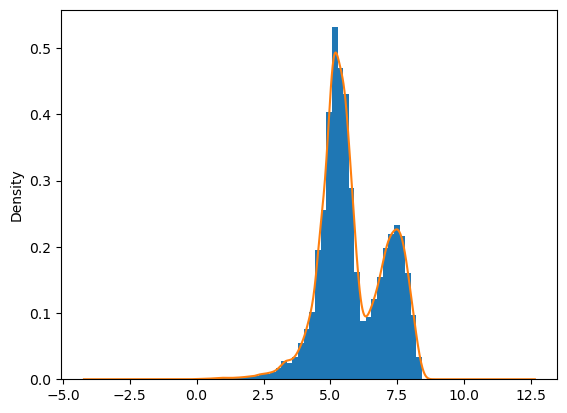

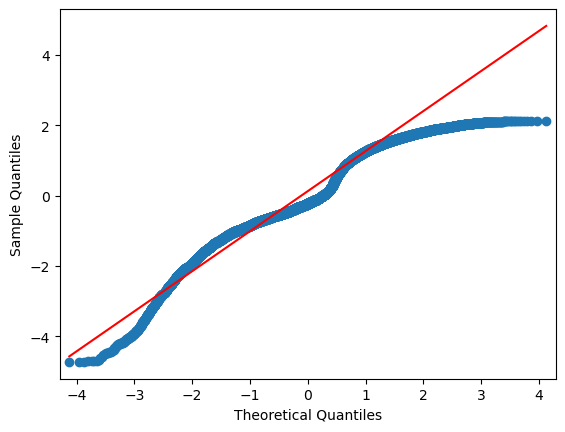

In [59]:
#yeo johnson transformation
test_data_1 = data.copy()
td3 = dftrans.yeo_johnson_transformation(test_data_1,'last_payment_amount')
print(plotter.is_data_skew(td3, 'last_payment_amount'))
plotter.hist_plotter(td3['last_payment_amount'], bins=40)
plotter.qq_plotter(td3,'last_payment_amount')

In [60]:
test_data_1 = data.copy()
test_data_1 = dftrans.box_cox_transformation(test_data_1,'loan_amount')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'funded_amount')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'funded_amount_inv')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'instalment')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'annual_inc')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'open_accounts')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_accounts')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_rec_prncp')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'total_payment')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_payment_inv')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'total_rec_int')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'last_payment_amount')
data_copy = test_data_1.copy()

# Milestone 3 Task 5 outliers visuals

## Before outlier removal

### loan_amount

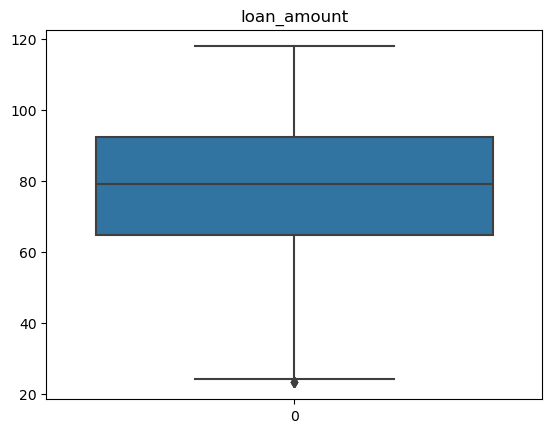

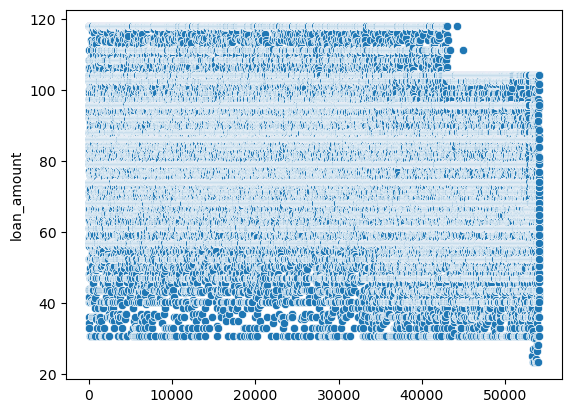

In [61]:
plotter.box_plot(data_copy, 'loan_amount')
plotter.scatter_plot(data_copy['loan_amount'])

### funded_amount

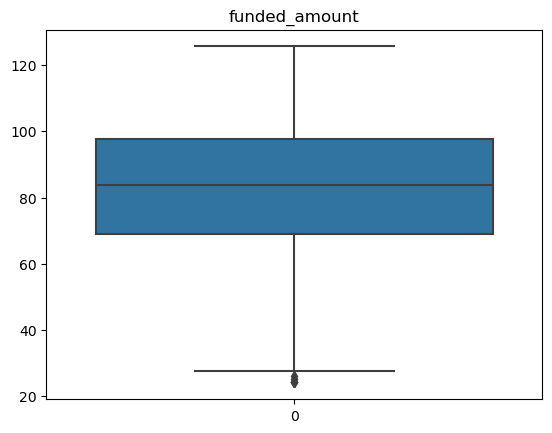

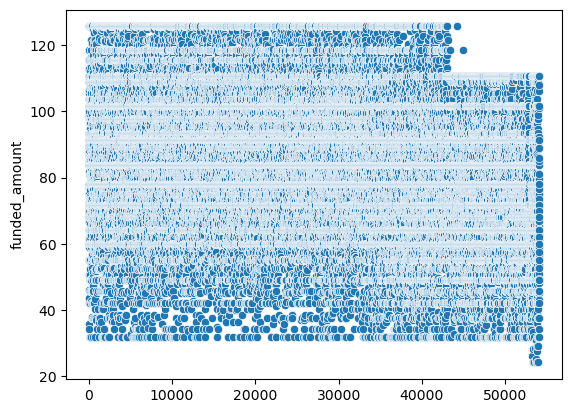

In [62]:
plotter.box_plot(data_copy, 'funded_amount')
plotter.scatter_plot(data_copy['funded_amount'])

### funded_amount_inv

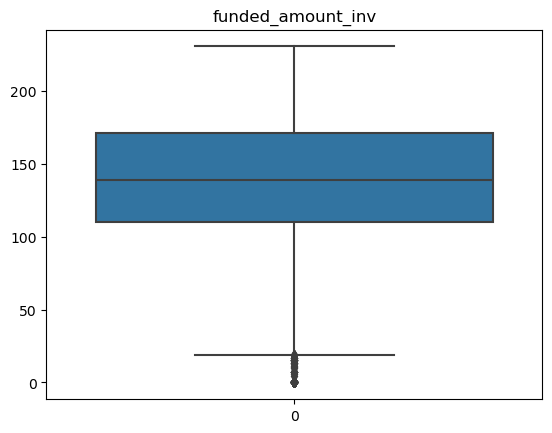

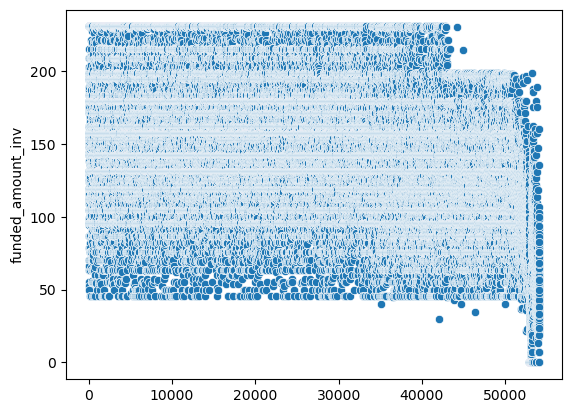

In [63]:
plotter.box_plot(data_copy, 'funded_amount_inv')
plotter.scatter_plot(data_copy['funded_amount_inv'])

### int_rate

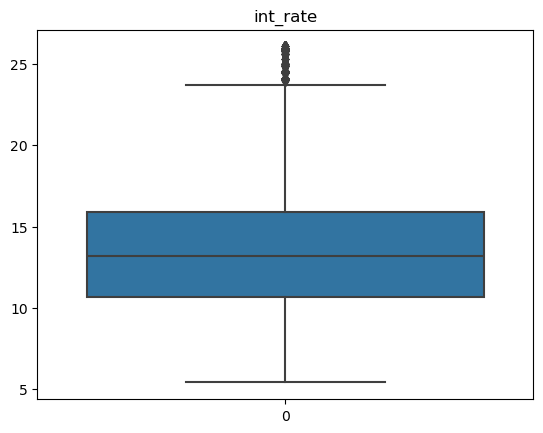

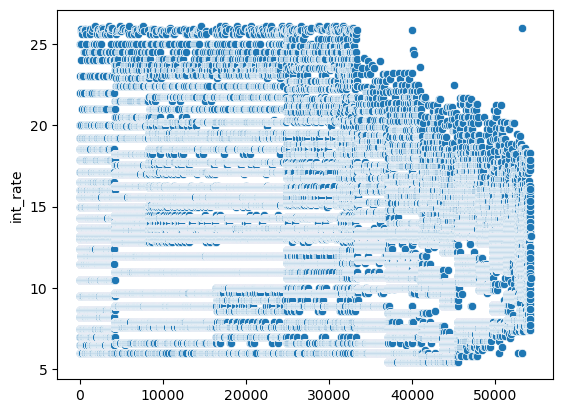

In [64]:
plotter.box_plot(data_copy, 'int_rate')
plotter.scatter_plot(data_copy['int_rate'])

### instalment

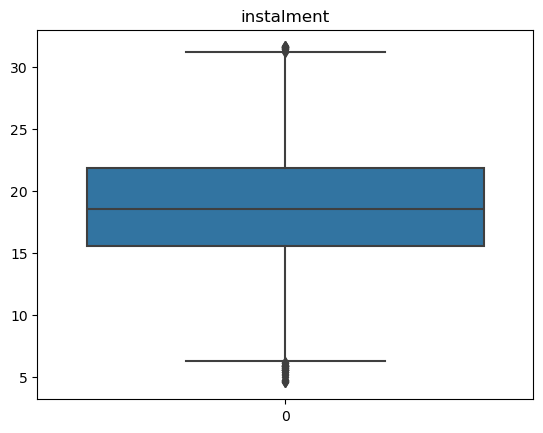

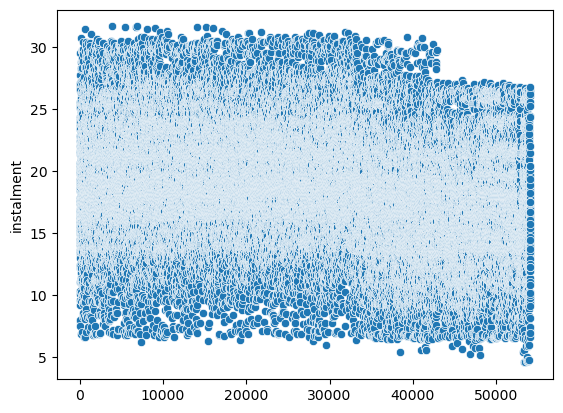

In [65]:
plotter.box_plot(data_copy, 'instalment')
plotter.scatter_plot(data_copy['instalment'])

### annual_inc

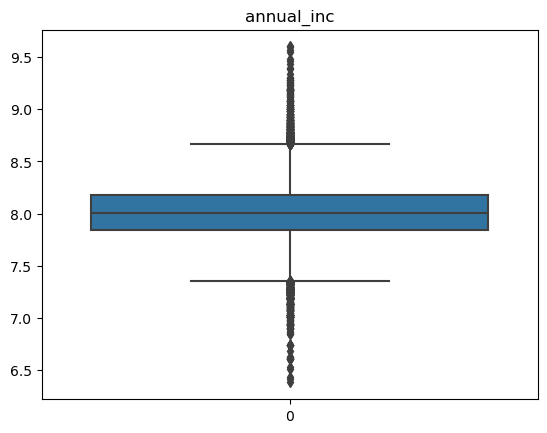

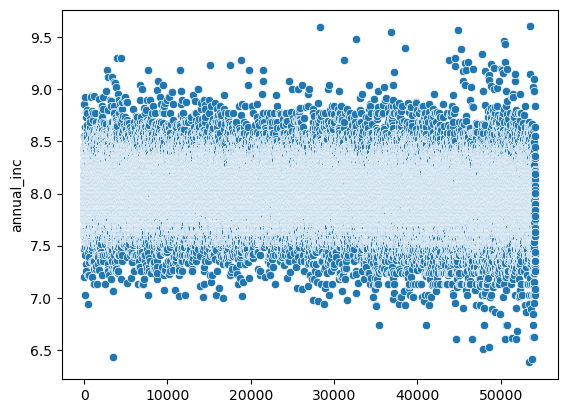

In [66]:
plotter.box_plot(data_copy, 'annual_inc')
plotter.scatter_plot(data_copy['annual_inc'])

### dti

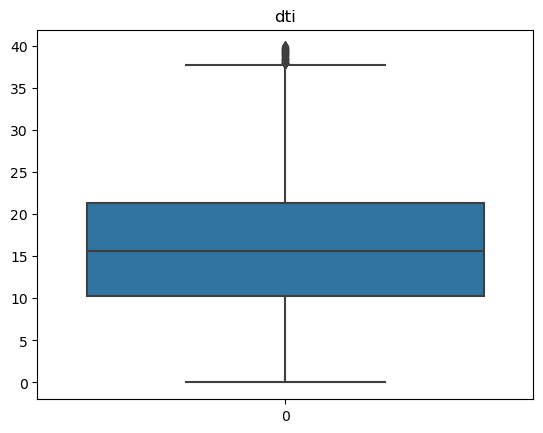

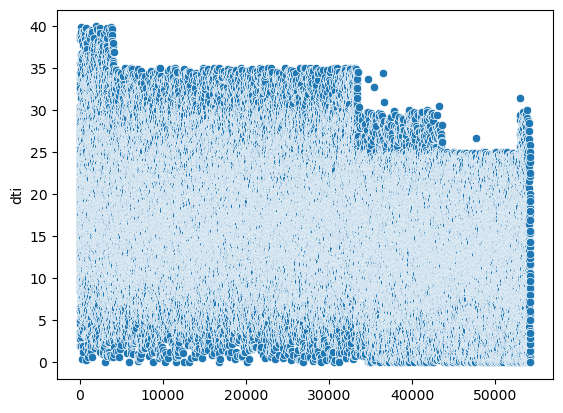

In [67]:
plotter.box_plot(data_copy, 'dti')
plotter.scatter_plot(data_copy['dti'])

### open_accounts

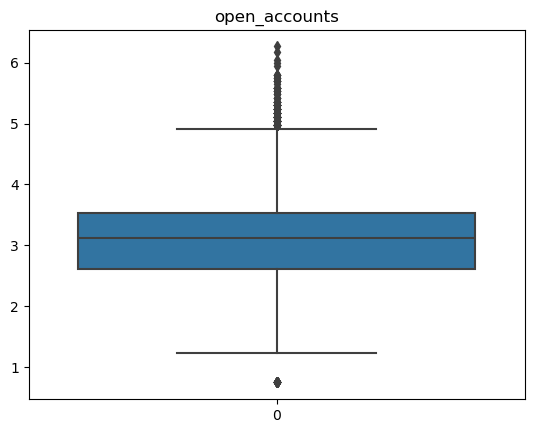

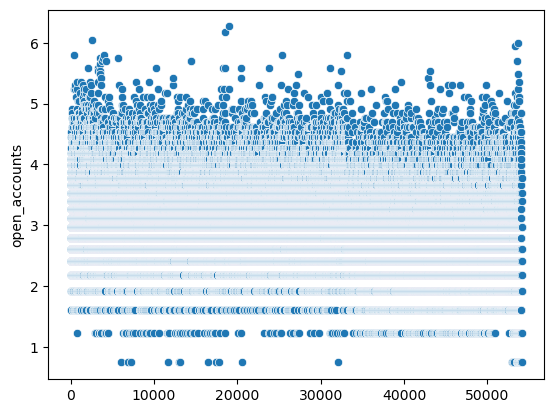

In [68]:
plotter.box_plot(data_copy, 'open_accounts')
plotter.scatter_plot(data_copy['open_accounts'])

### total_accounts

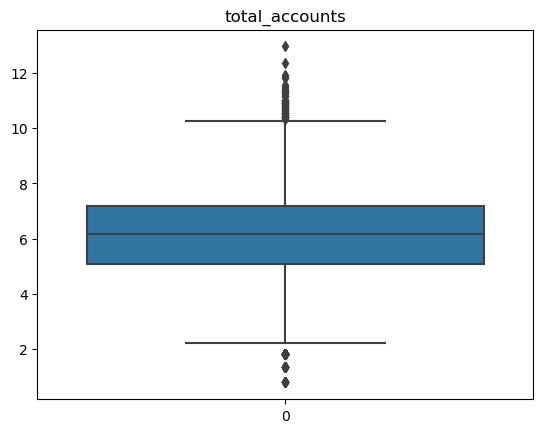

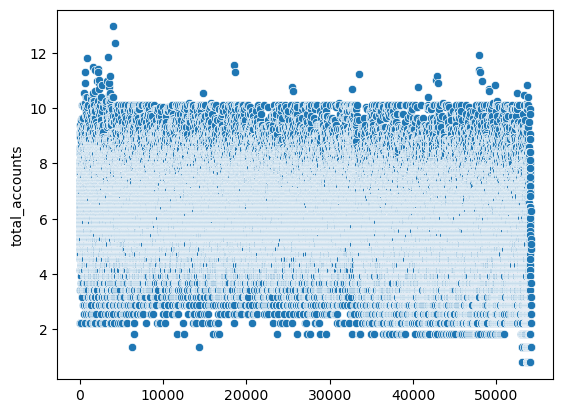

In [69]:
plotter.box_plot(data_copy, 'total_accounts')
plotter.scatter_plot(data_copy['total_accounts'])

### total_payment

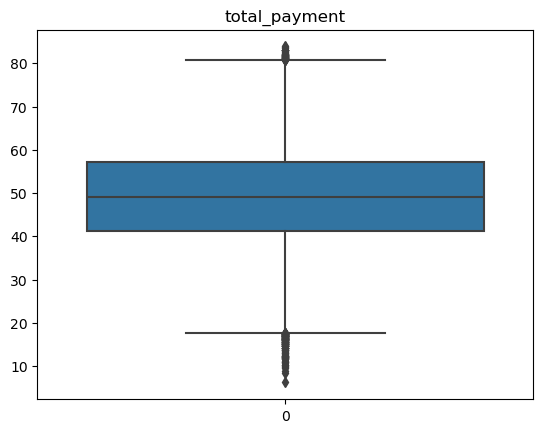

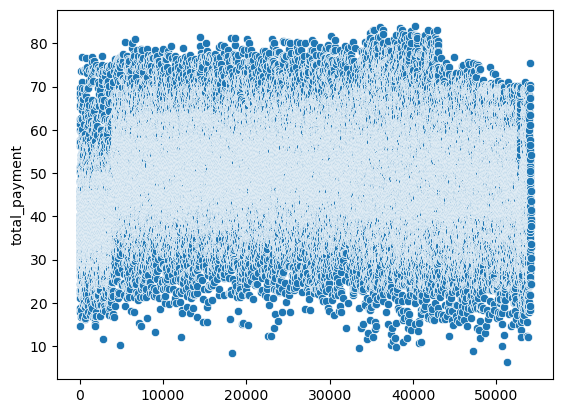

In [70]:
plotter.box_plot(data_copy, 'total_payment')
plotter.scatter_plot(data_copy['total_payment'])

### total_payment_inv

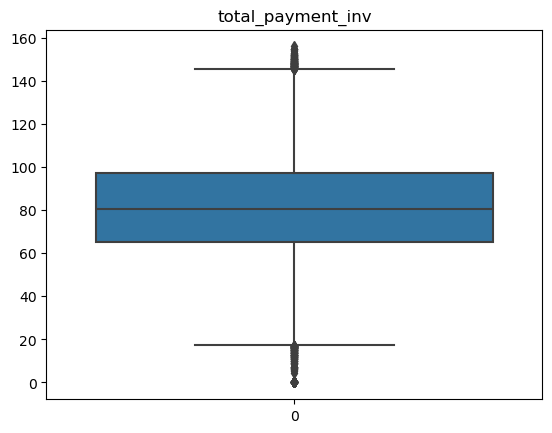

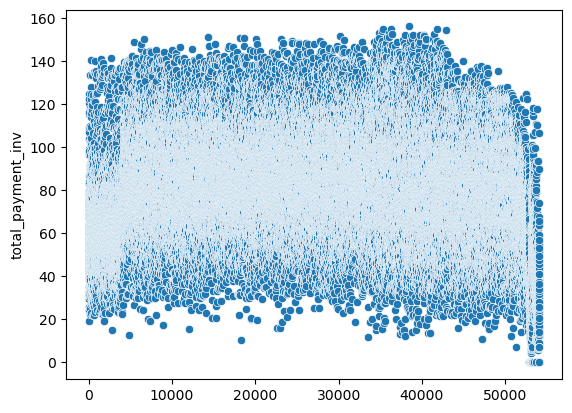

In [71]:
plotter.box_plot(data_copy, 'total_payment_inv')
plotter.scatter_plot(data_copy['total_payment_inv'])

### total_rec_int

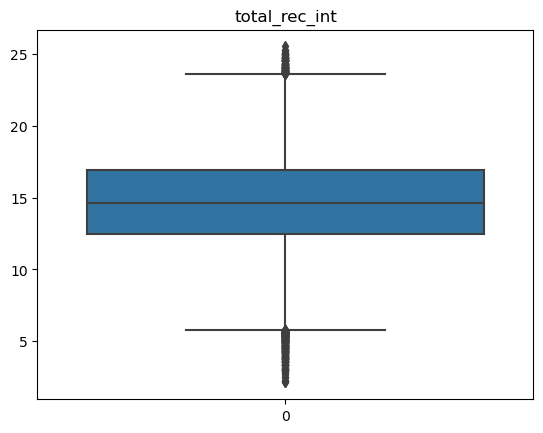

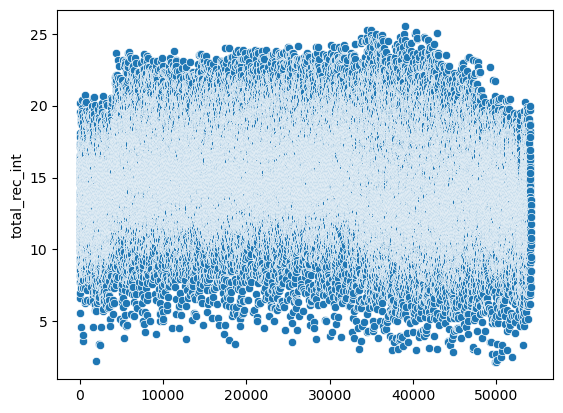

In [72]:
plotter.box_plot(data_copy, 'total_rec_int')
plotter.scatter_plot(data_copy['total_rec_int'])

### Removing outliers

In [73]:
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

for column in outlier_columns: # For each column that will have outliers removed.
    data_copy = dftrans.remove_outliers(data_copy, column) # Drop the rows which contain 'z score' greater than 3 for the column being iterated.
 

## After outlier removal

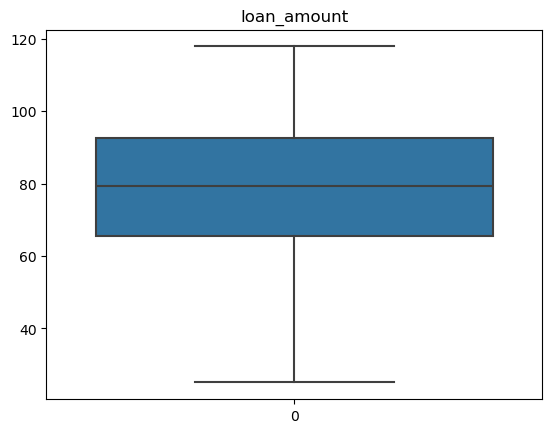

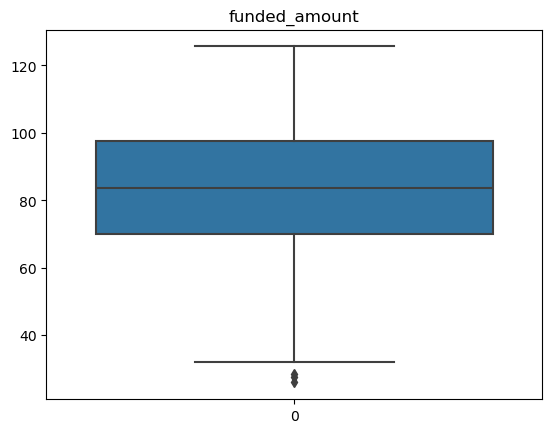

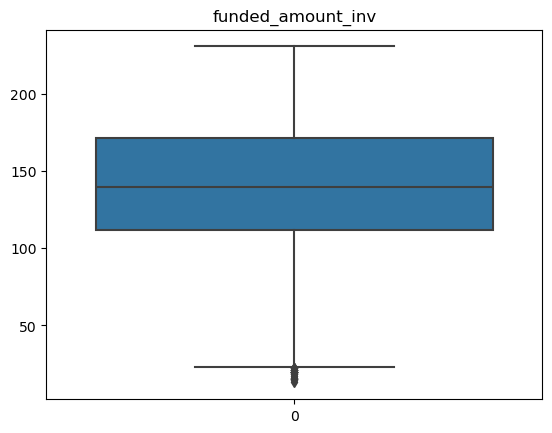

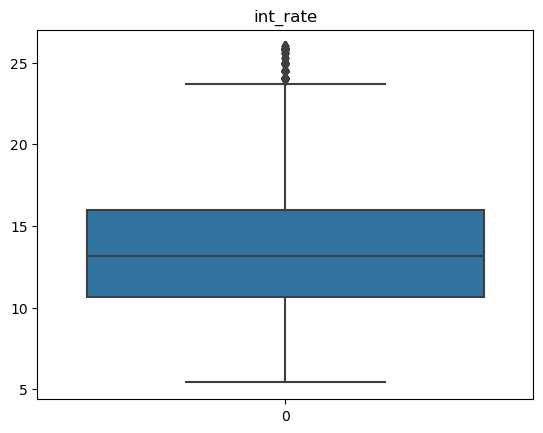

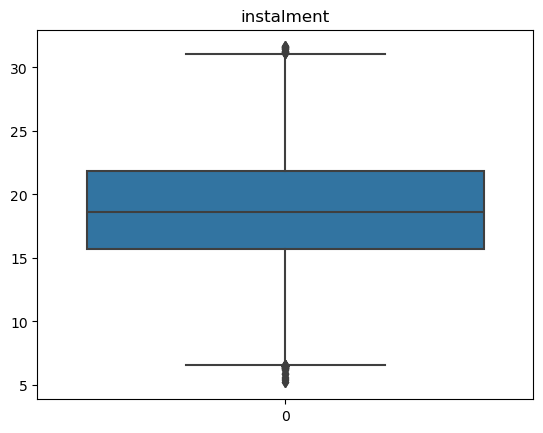

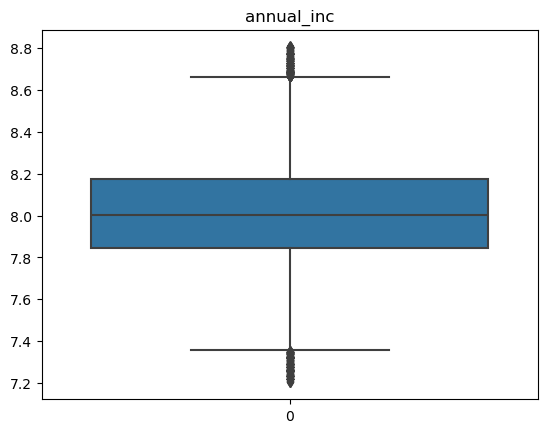

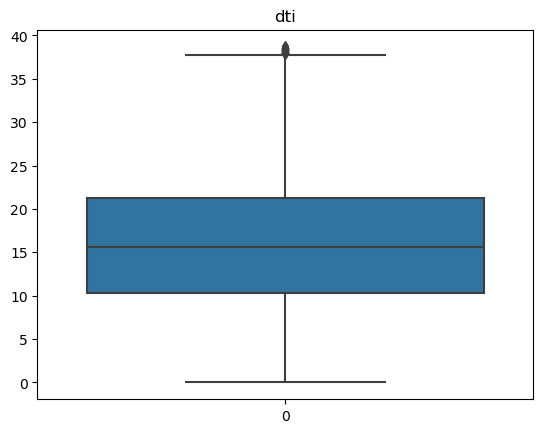

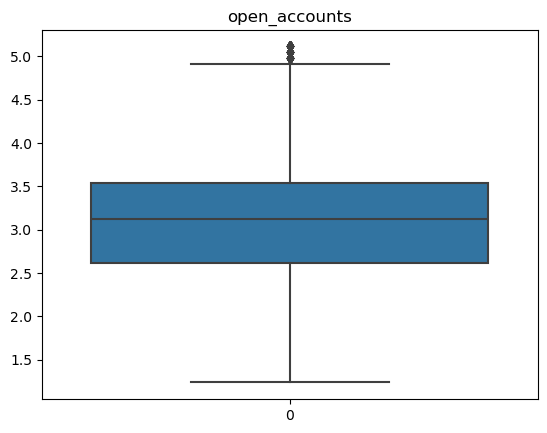

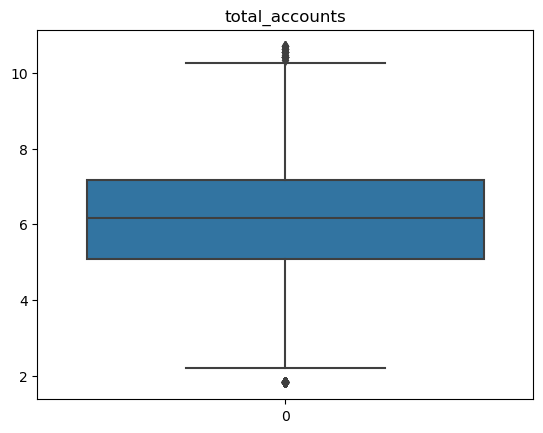

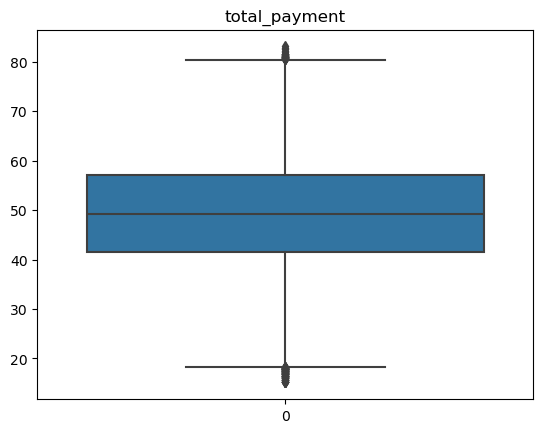

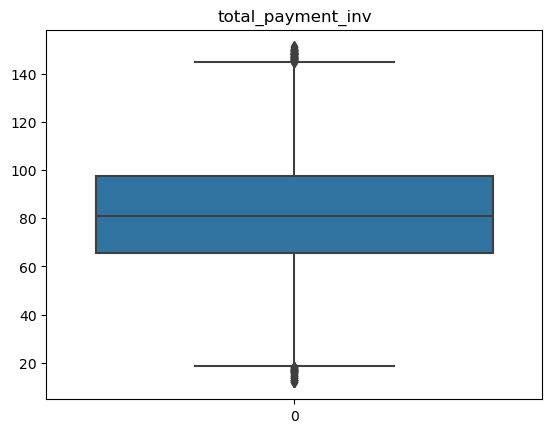

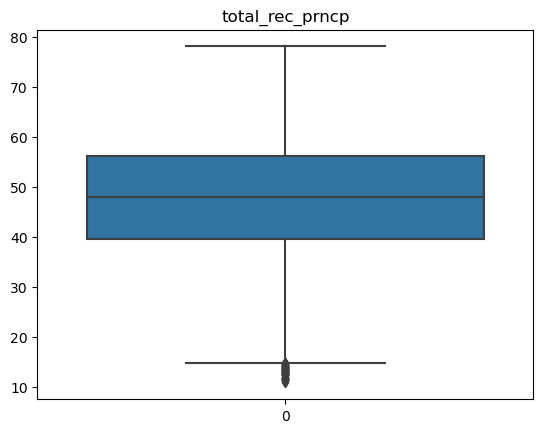

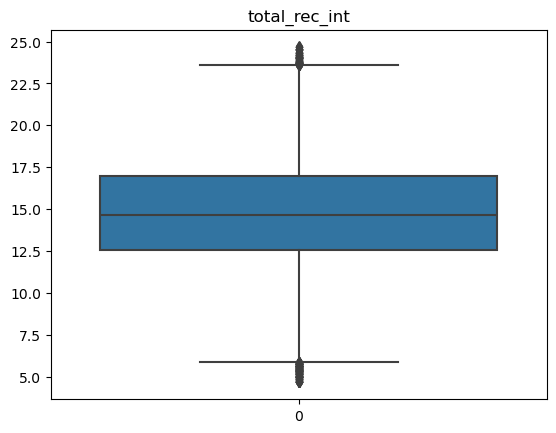

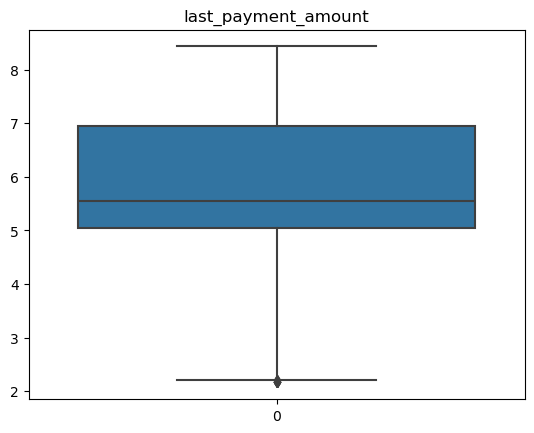

In [74]:
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

for column in outlier_columns:   
    plotter.box_plot(data_copy, column)